# Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBRFRegressor
import warnings
warnings.filterwarnings('ignore') 

# Feature Discription

In [2]:
dic=pd.read_excel('Data_Dictionary.xlsx')
dic=dic.set_index('Variable')
dic

Description
Variable                                                                
ID                                          Unique ID for every Customer
account_type                            Account Type – current or saving
gender                                                Gender of customer
age                                                      Age of customer
region_code             Code assigned to region of residence (has order)
cc_cons_apr                                   Credit card spend in April
dc_cons_apr                                    Debit card spend in April
cc_cons_may                                     Credit card spend in May
dc_cons_may                                      Debit card spend in May
cc_cons_jun                                    Credit card spend in June
dc_cons_jun                                     Debit card spend in June
cc_count_apr                 Number of credit card transactions in April
cc_count_may                   Number of credit card transactions in May
cc_count_jun                  Number of credit card transactions in June
dc_count_apr                  Number of debit card transactions in April
dc_count_may                    Number of debit card transactions in May
dc_count_jun                   Number of debit card transactions in June
card_lim                             Maximum Credit Card Limit allocated
personal_loan_active                Active personal loan with other bank
vehicle_loan_active                  Active Vehicle loan with other bank
personal_loan_closed              Closed personal loan in last 12 months
vehicle_loan_closed                Closed vehicle loan in last 12 months
investment_1                                    DEMAT investment in june
investment_2                            fixed deposit investment in june
investment_3                           Life Insurance investment in June
investment_4                        General Insurance Investment in June
debit_amount_apr                          Total amount debited for April
credit_amount_apr                        Total amount credited for April
debit_count_apr            Total number of times amount debited in april
credit_count_apr          Total number of times amount credited in april
max_credit_amount_apr                   Maximum amount credited in April
debit_amount_may                            Total amount debited for May
credit_amount_may                          Total amount credited for May
credit_count_may            Total number of times amount credited in May
debit_count_may              Total number of times amount debited in May
max_credit_amount_may                     Maximum amount credited in May
debit_amount_jun                           Total amount debited for June
credit_amount_jun                         Total amount credited for June
credit_count_jun           Total number of times amount credited in June
debit_count_jun             Total number of times amount debited in June
max_credit_amount_jun                    Maximum amount credited in June
loan_enq                                   Loan enquiry in last 3 months
emi_active               Monthly EMI paid to other bank for active loans
cc_cons                (Target) Average Credit Card Spend in next thr...

# Data loading 

In [3]:
data_train=pd.read_csv('train.csv').set_index('ID')
data_train.head()

account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
ID                                                                      
12554      current      M   35          708     24893.00       378.00   
17645      current      M   35          123     18941.62       966.00   
7604       current      M   55          802      5678.87      2724.00   
1590       current      F   29          867     30489.50      1236.00   
16556      current      M   34          802      7441.40      6906.04   

       cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  ...  \
ID                                                         ...   
12554     10288.00     29664.00     16291.40     11432.00  ...   
17645     20672.00       287.00      4217.00       885.00  ...   
7604       1964.50      3933.11     23956.25      5168.00  ...   
1590      12609.88      9138.14     17521.00     13650.30  ...   
16556      4364.00      1939.00      2121.00      6829.18  ...   

       debit_count_may  max_credit_amount_may  debit_amount_jun  \
ID                                                                
12554             40.0                24563.0          30051.32   
17645             78.0                23948.0          42119.05   
7604              82.0                10752.0          58373.25   
1590              38.0                12607.0          69851.51   
16556             50.0                25213.0          10071.00   

       credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                            
12554            12761.0               2.0             65.0   
17645            76206.0              21.0             63.0   
7604             75283.0               7.0              1.0   
1590             68708.0              21.0             83.0   
16556            80140.0               8.0             32.0   

       max_credit_amount_jun  loan_enq  emi_active  cc_cons  
ID                                                           
12554                50836.0         Y     1674.09  20014.0  
17645                23226.0         Y    13043.34  10173.0  
7604                 27036.0         Y    25375.27  16095.0  
1590                 43037.0         Y     3544.33   7707.0  
16556                32044.0         Y    12780.44  96408.0  

[5 rows x 43 columns]

# Null value Cheack

In [4]:
def null_value_cheak(dataframe):
    null_value=dataframe.isna().sum()
    return null_value


null_value_cheak(data_train)

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
c

Description:-dataset dont have "null" value..

# Data basic information and description:-

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 12554 to 4547
Data columns (total 43 columns):
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
personal_loan_active     15000 non-null float64
vehicle_loan_active      15000

In [6]:
def data_describe(data):
    data=data.select_dtypes(include=np.number)
    des=data.describe().T
    return des 

data_describe(data_train)

count           mean           std       min  \
age                    15000.0      47.790600  3.063277e+01     25.00   
region_code            15000.0     598.415467  2.200623e+02    123.00   
cc_cons_apr            15000.0   17957.391719  2.518794e+04    253.00   
dc_cons_apr            15000.0    8171.098287  1.477303e+04     19.35   
cc_cons_may            15000.0   16337.054662  2.706085e+04    157.00   
dc_cons_may            15000.0    7703.605203  1.898730e+04     22.00   
cc_cons_jun            15000.0   12129.010832  1.848878e+04     65.00   
dc_cons_jun            15000.0    7097.395321  1.325170e+04     62.00   
cc_count_apr           15000.0      41.488333  9.743225e+01      1.00   
cc_count_may           15000.0      33.490200  4.954100e+01      1.00   
cc_count_jun           15000.0      41.507000  4.734292e+01      1.00   
dc_count_apr           15000.0      17.171000  1.935968e+01      1.00   
dc_count_may           15000.0      13.979733  1.708720e+01      1.00   
dc_count_jun           15000.0      30.287267  2.925249e+01      1.00   
card_lim               15000.0  277005.147400  1.794295e+05      0.00   
personal_loan_active   15000.0       1.000000  0.000000e+00      1.00   
vehicle_loan_active    15000.0       1.000000  0.000000e+00      1.00   
personal_loan_closed   15000.0       1.000000  0.000000e+00      1.00   
vehicle_loan_closed    15000.0       1.000000  0.000000e+00      1.00   
investment_1           15000.0  619414.041266  3.087815e+06      0.30   
investment_2           15000.0  233364.156531  4.073237e+05      3.00   
investment_3           15000.0   44440.348527  8.811319e+04    462.00   
investment_4           15000.0    3523.049025  7.373355e+03 -12179.00   
debit_amount_apr       15000.0   68234.213535  1.126786e+05      4.01   
credit_amount_apr      15000.0   80797.613772  1.989060e+05     61.38   
debit_count_apr        15000.0      36.400267  3.070100e+01      0.00   
credit_count_apr       15000.0      11.291400  1.267078e+01      0.00   
max_credit_amount_apr  15000.0   54389.538175  1.950943e+05      1.00   
debit_amount_may       15000.0   65544.915782  1.016829e+05     28.20   
credit_amount_may      15000.0   83569.352222  1.776300e+05     10.61   
credit_count_may       15000.0      11.923133  1.684356e+01      0.00   
debit_count_may        15000.0      40.996867  4.053735e+01      0.00   
max_credit_amount_may  15000.0   57187.905699  2.000194e+05      0.25   
debit_amount_jun       15000.0   76159.867235  1.545112e+05      5.23   
credit_amount_jun      15000.0   78503.163457  1.482005e+05     11.88   
credit_count_jun       15000.0      19.946400  2.720017e+01      1.00   
debit_count_jun        15000.0      44.647867  3.508908e+01      0.00   
max_credit_amount_jun  15000.0   52586.542878  1.282601e+05      0.06   
emi_active             15000.0   15760.404015  1.179153e+05      0.00   
cc_cons                15000.0   55157.729867  9.767097e+04      0.00   

                               25%        50%          75%          max  
age                        33.0000      40.00      53.0000       223.00  
region_code               424.0000     623.00     799.0000       974.00  
cc_cons_apr              4411.0275   10288.10   21405.0000    441031.33  
dc_cons_apr              1634.0000    3996.90    9339.0200    229255.00  
cc_cons_may              3638.0000    8695.03   18951.3000   1117246.31  
dc_cons_may              1643.5000    3820.50    8212.0000    911223.49  
cc_cons_jun              3004.5000    6655.25   14247.0000    382914.10  
dc_cons_jun              1358.7500    3327.00    7597.0000    233384.00  
cc_count_apr                5.0000      10.00      44.0000       531.00  
cc_count_may                8.0000      23.00      43.0000       601.00  
cc_count_jun               10.0000      35.00      61.0000       653.00  
dc_count_apr                2.0000       7.00      25.0000        82.00  
dc_count_may                2.0000       5.00      21.0000        71.

From above:-
*the feature name "'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', and 'vehicle_loan_closed' " have zero varience so we have to drop this columns
*maximum  age  243 is also not posible,so we have to investigate this column!
*'investment4' column which has negative value,it is not possible,so we have to change it to +value.

In [7]:
std=data_train.describe().iloc[2,:]
std_0=std[std==0].index
std_0

Index(['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed'],
      dtype='object')

In [8]:
#negative value treatment in investment4 column
data_train['investment_4']=data_train['investment_4'].apply(lambda x: -x if x<0 else x)


#  Outlier detection for Numeric data


for categorical data

In [9]:
def cat_data(data):
    cat_data=data.select_dtypes(include='object')
    return cat_data

def num_data(data):
    num_data=data.select_dtypes(exclude='object')
    return num_data
num_data=num_data(data_train)
num_data.head()

age  region_code  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  \
ID                                                                            
12554   35          708     24893.00       378.00     10288.00     29664.00   
17645   35          123     18941.62       966.00     20672.00       287.00   
7604    55          802      5678.87      2724.00      1964.50      3933.11   
1590    29          867     30489.50      1236.00     12609.88      9138.14   
16556   34          802      7441.40      6906.04      4364.00      1939.00   

       cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  ...  \
ID                                                           ...   
12554     16291.40     11432.00           2.0          26.0  ...   
17645      4217.00       885.00           1.0           7.0  ...   
7604      23956.25      5168.00          43.0          32.0  ...   
1590      17521.00     13650.30          53.0           1.0  ...   
16556      2121.00      6829.18          67.0          47.0  ...   

       credit_count_may  debit_count_may  max_credit_amount_may  \
ID                                                                
12554               2.0             40.0                24563.0   
17645               2.0             78.0                23948.0   
7604                2.0             82.0                10752.0   
1590               23.0             38.0                12607.0   
16556              24.0             50.0                25213.0   

       debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                                              
12554          30051.32            12761.0               2.0             65.0   
17645          42119.05            76206.0              21.0             63.0   
7604           58373.25            75283.0               7.0              1.0   
1590           69851.51            68708.0              21.0             83.0   
16556          10071.00            80140.0               8.0             32.0   

       max_credit_amount_jun  emi_active  cc_cons  
ID                                                 
12554                50836.0     1674.09  20014.0  
17645                23226.0    13043.34  10173.0  
7604                 27036.0    25375.27  16095.0  
1590                 43037.0     3544.33   7707.0  
16556                32044.0    12780.44  96408.0  

[5 rows x 40 columns]

In [10]:
cat_data=cat_data(data_train)
cat_data.head()

account_type gender loan_enq
ID                                
12554      current      M        Y
17645      current      M        Y
7604       current      M        Y
1590       current      F        Y
16556      current      M        Y

In [11]:
data_train=data_train.drop('region_code',axis=1)

In [12]:
value= dict()
for col in cat_data.columns:
    count=cat_data[col].value_counts()/len(cat_data)
    value.update(count)
value

{'current': 0.8484666666666667,
 'saving': 0.15153333333333333,
 'M': 0.863,
 'F': 0.137,
 'Y': 1.0}

In [13]:
data_train=data_train.drop('loan_enq',axis=1)

In [14]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(num_data)

Feature Number of Outliers
0                     age                534
1             region_code                  0
2             cc_cons_apr               1217
3             dc_cons_apr               1220
4             cc_cons_may               1202
5             dc_cons_may               1248
6             cc_cons_jun               1181
7             dc_cons_jun               1366
8            cc_count_apr                883
9            cc_count_may                709
10           cc_count_jun                 49
11           dc_count_apr                434
12           dc_count_may               1233
13           dc_count_jun                  0
14               card_lim                 59
15   personal_loan_active                  0
16    vehicle_loan_active                  0
17   personal_loan_closed                  0
18    vehicle_loan_closed                  0
19           investment_1               2123
20           investment_2               1297
21           investment_3               1554
22           investment_4               1109
23       debit_amount_apr               1239
24      credit_amount_apr               1229
25        debit_count_apr                231
26       credit_count_apr                 58
27  max_credit_amount_apr               1376
28       debit_amount_may               1235
29      credit_amount_may               1173
30       credit_count_may               2655
31        debit_count_may                617
32  max_credit_amount_may               1300
33       debit_amount_jun               1164
34      credit_amount_jun               1218
35       credit_count_jun               2217
36        debit_count_jun                  0
37  max_credit_amount_jun               1385
38             emi_active               1393
39                cc_cons               3134

# EDA & Data Visualizations

# Univarient:-
for numerical feature

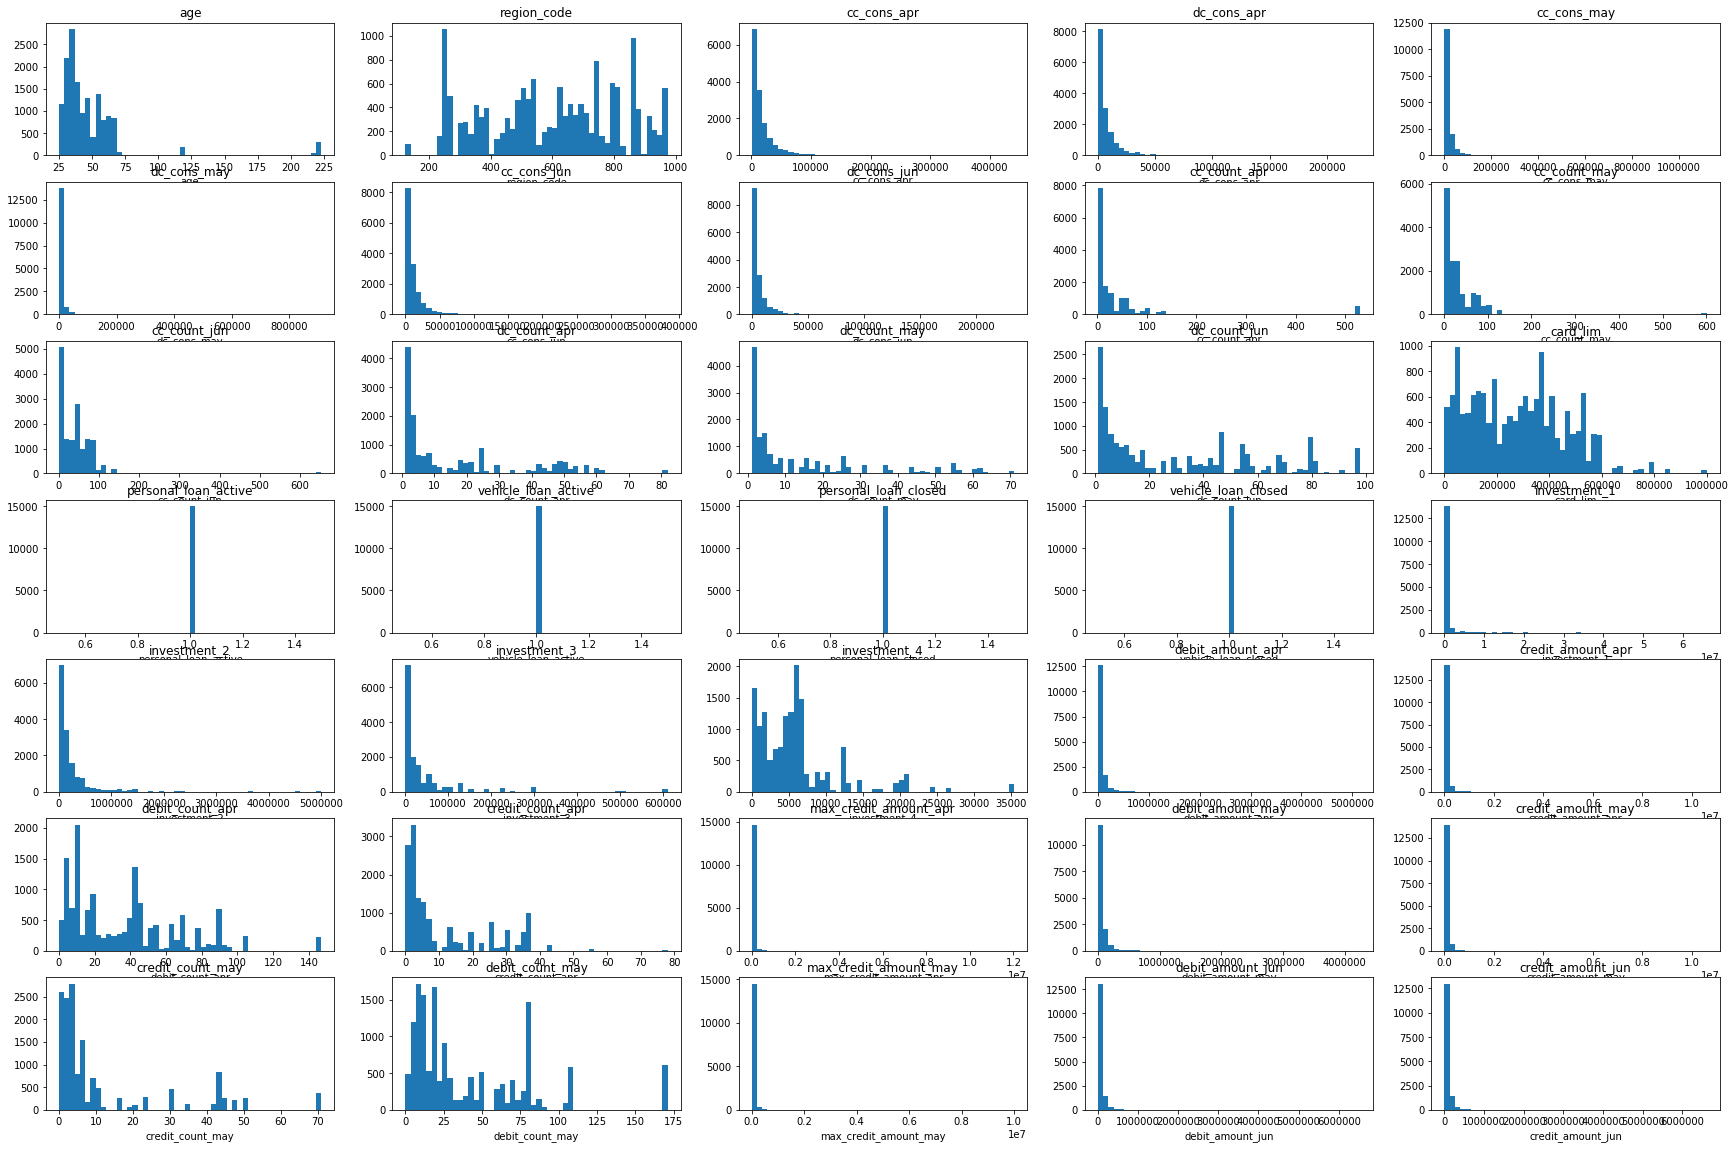

In [15]:
cols = num_data.columns

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
try:
    for i in range(0,7):
        for j in range(0,5):
            col = cols[i*5 + j]
            axes[i,j].set_title(col)
            axes[i,j].hist(num_data[col],bins=50)
            #plt.figure(figsize=(20,20))
            axes[i,j].set_xlabel(col)
        
except IndexError:
    print('index 34 is out of bounds for axis 0 with size 34')

     
            
            

for categorical feature:-


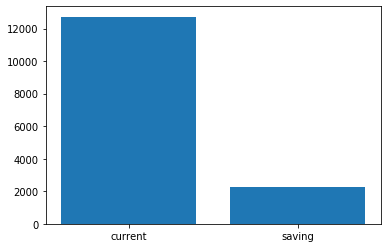

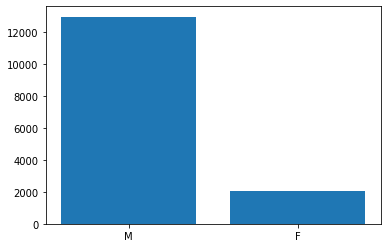

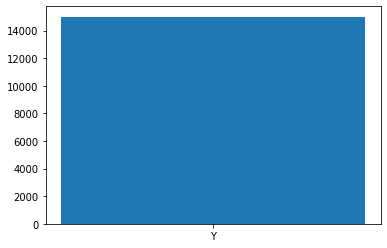

In [16]:

for col in cat_data.columns:
    plt.bar(cat_data[col].value_counts().index,cat_data[col].value_counts().values)
    plt.show()

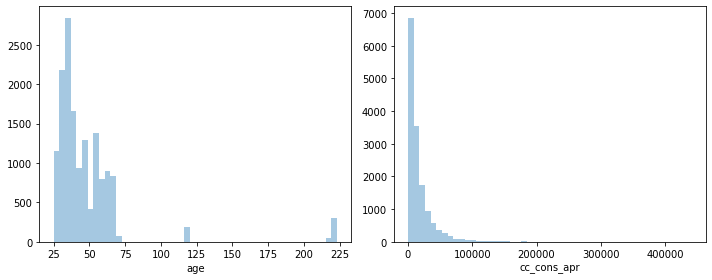

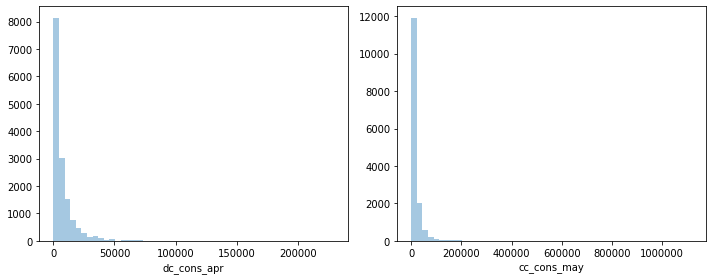

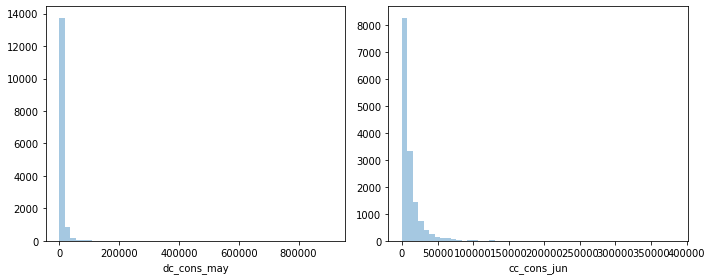

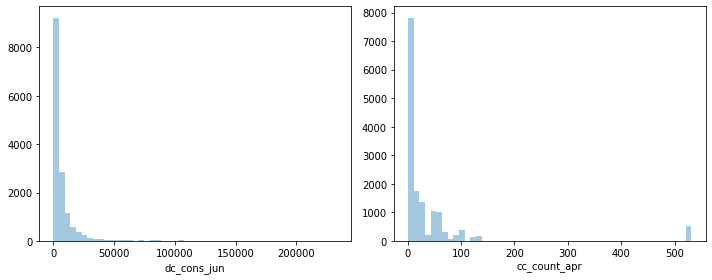

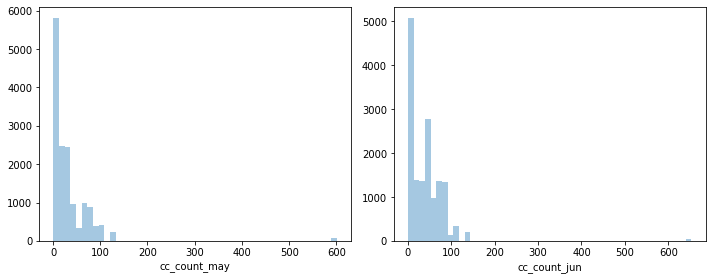

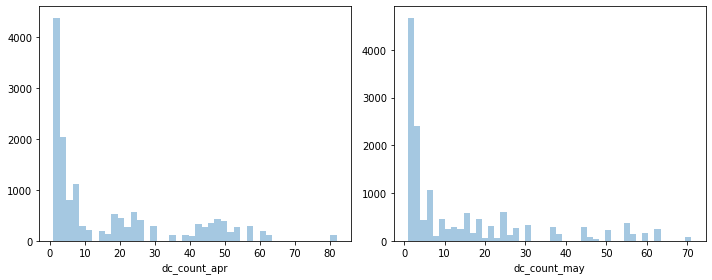

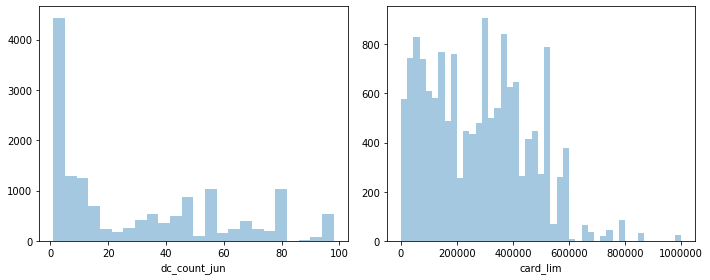

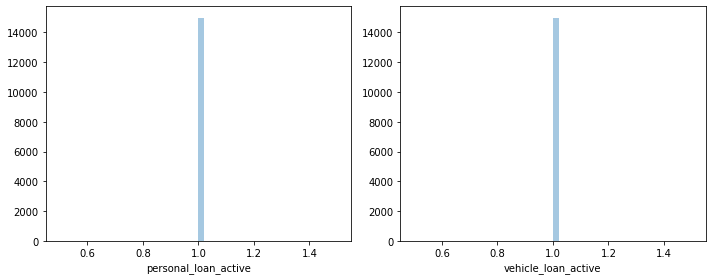

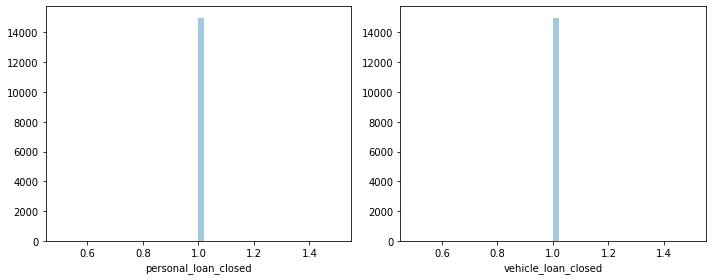

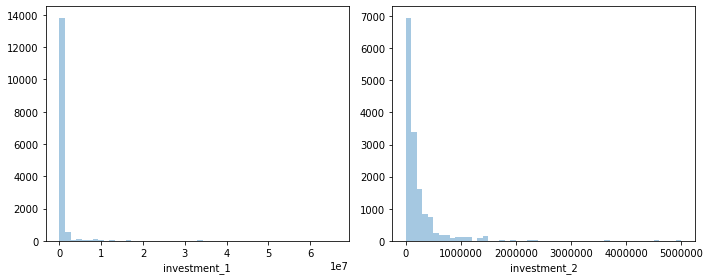

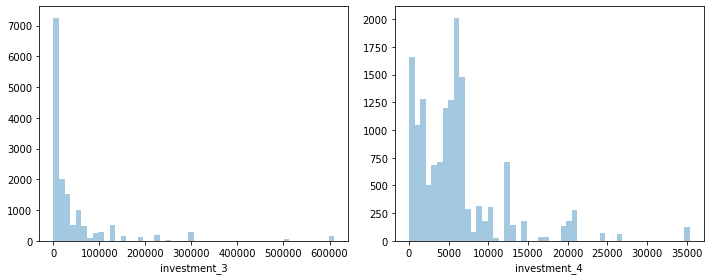

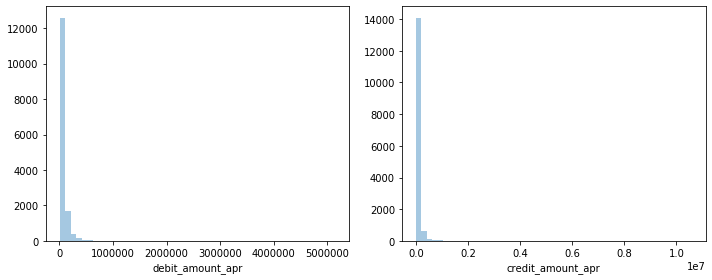

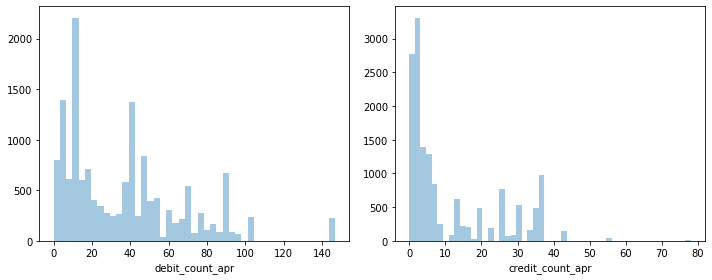

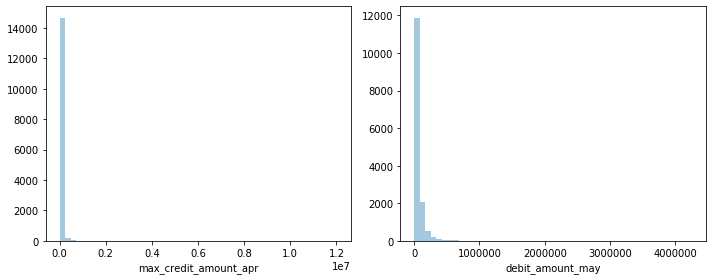

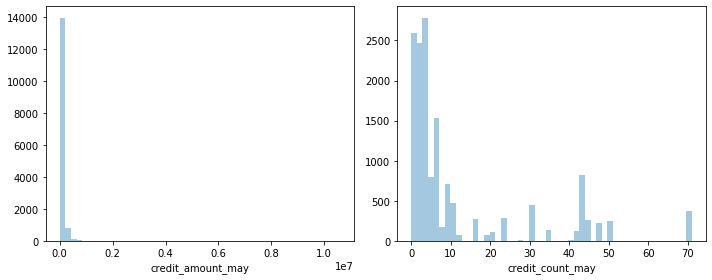

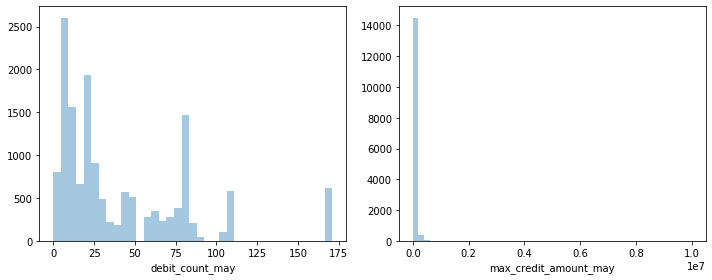

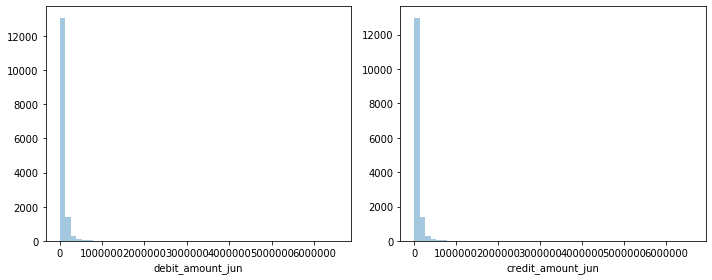

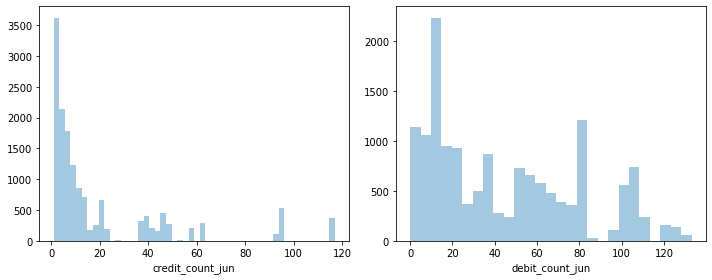

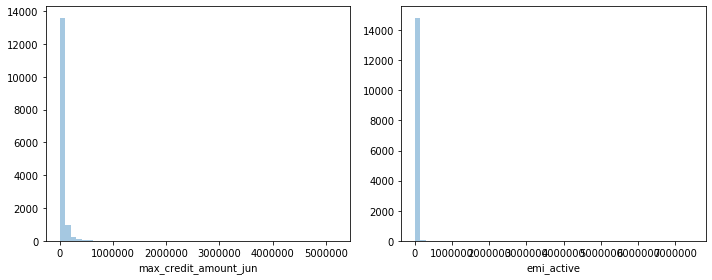

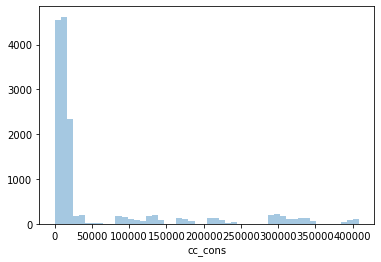

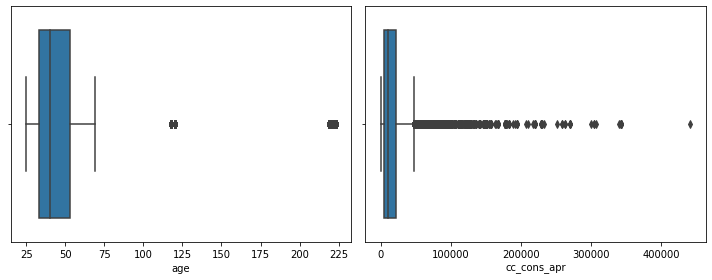

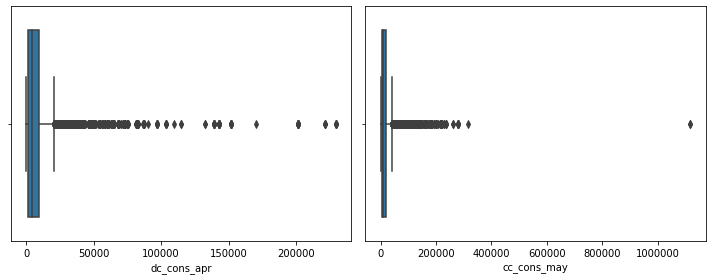

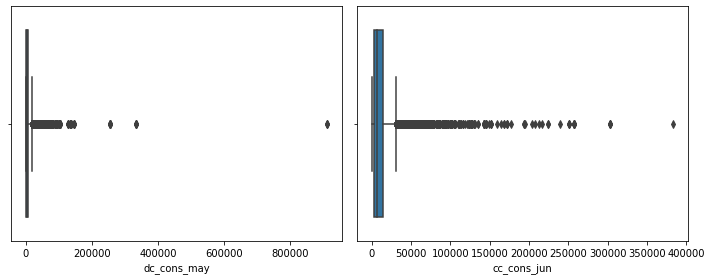

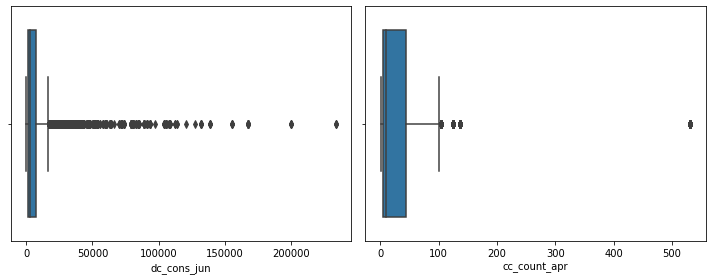

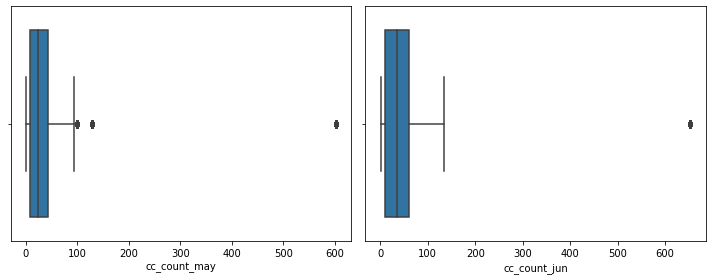

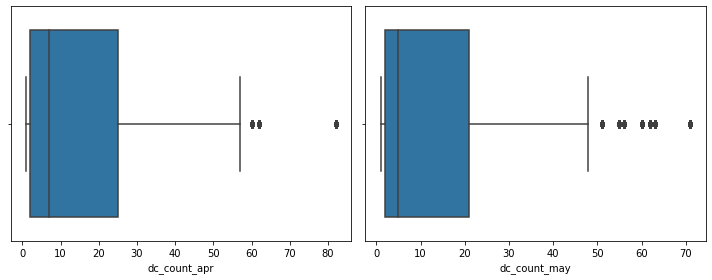

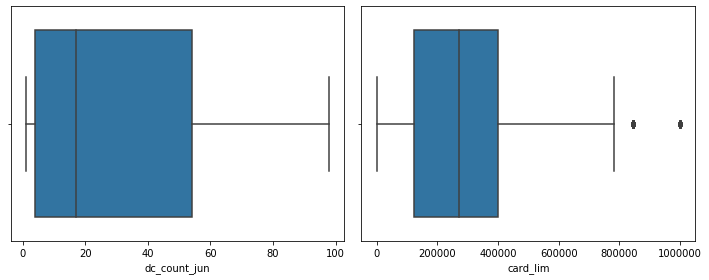

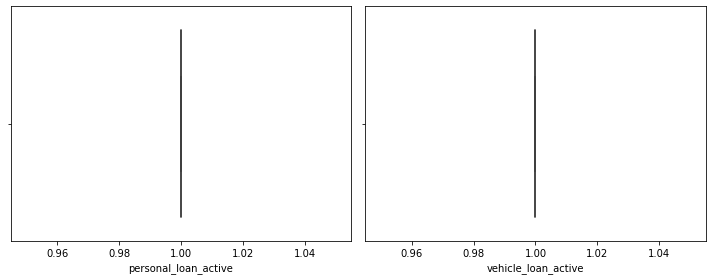

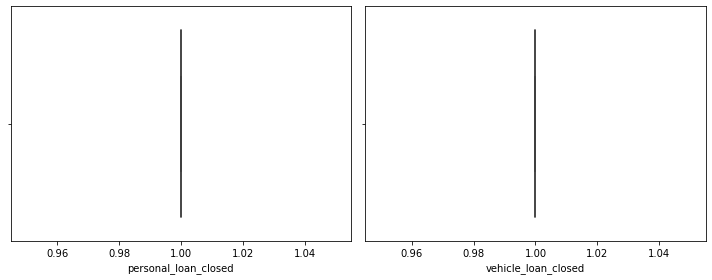

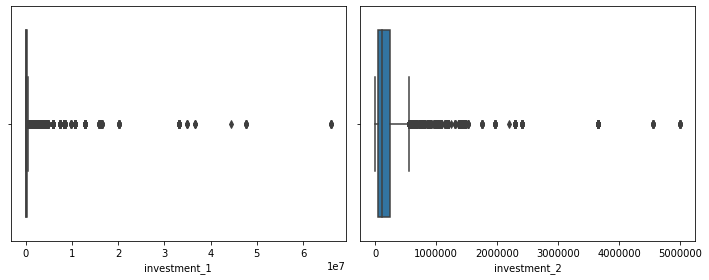

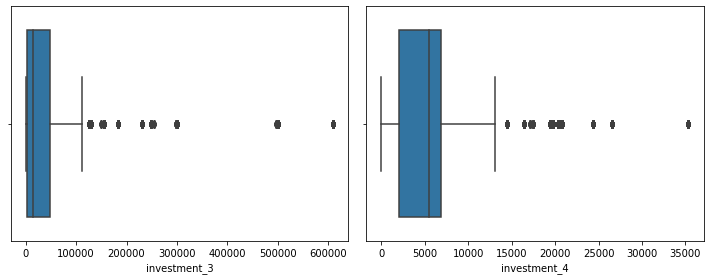

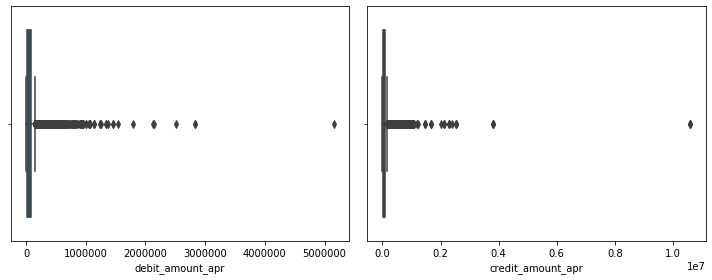

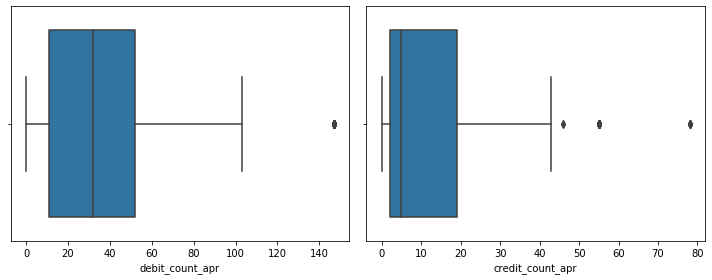

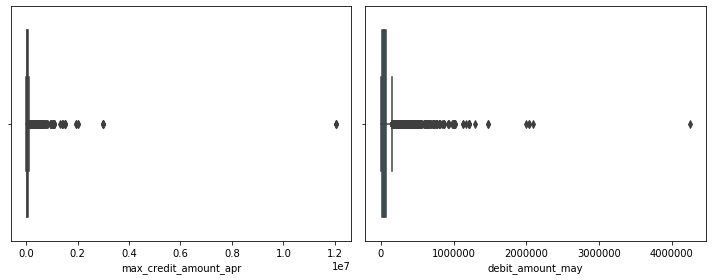

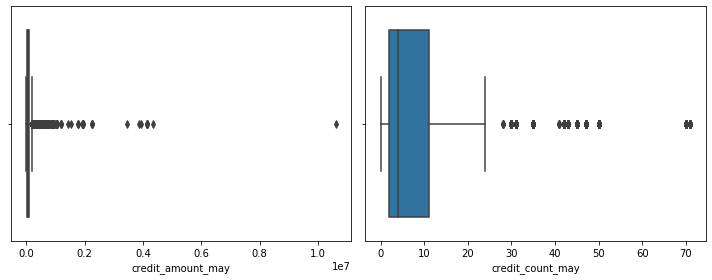

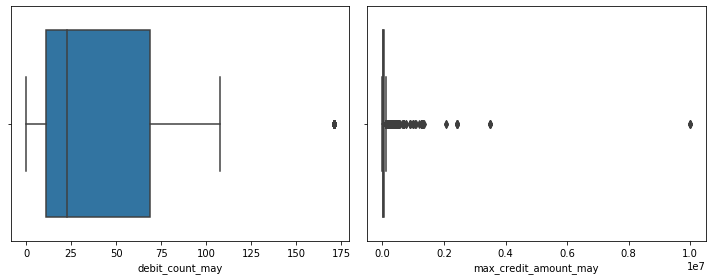

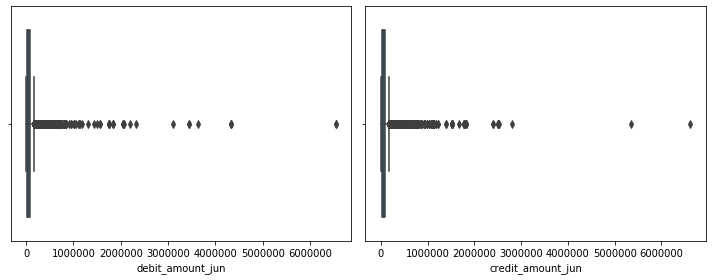

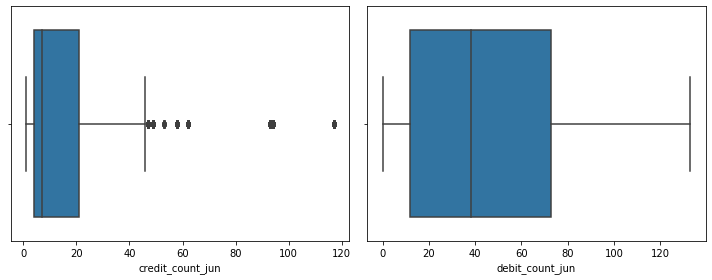

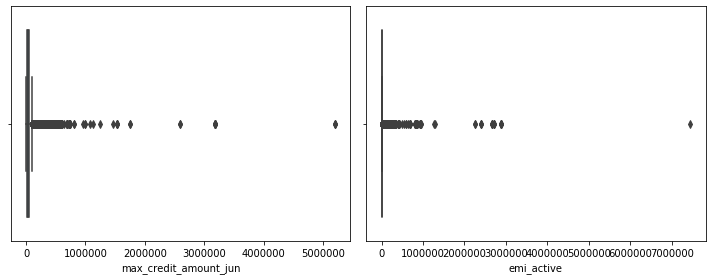

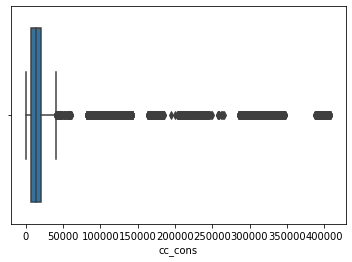

In [17]:
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(data_train)            
plot_box_plots(data_train)

In [18]:
data_train.skew()

age                       4.386093
cc_cons_apr               4.838710
dc_cons_apr               7.135574
cc_cons_may              12.056921
dc_cons_may              25.321685
cc_cons_jun               6.108982
dc_cons_jun               6.569554
cc_count_apr              4.417547
cc_count_may              7.518349
cc_count_jun              7.190550
dc_count_apr              1.102698
dc_count_may              1.526300
dc_count_jun              0.732877
card_lim                  0.442569
personal_loan_active      0.000000
vehicle_loan_active       0.000000
personal_loan_closed      0.000000
vehicle_loan_closed       0.000000
investment_1             11.603971
investment_2              5.475358
investment_3              4.075013
investment_4              2.175285
debit_amount_apr         13.104348
credit_amount_apr        32.632376
debit_count_apr           1.089453
credit_count_apr          1.161724
max_credit_amount_apr    47.952438
debit_amount_may         10.296853
credit_amount_may   

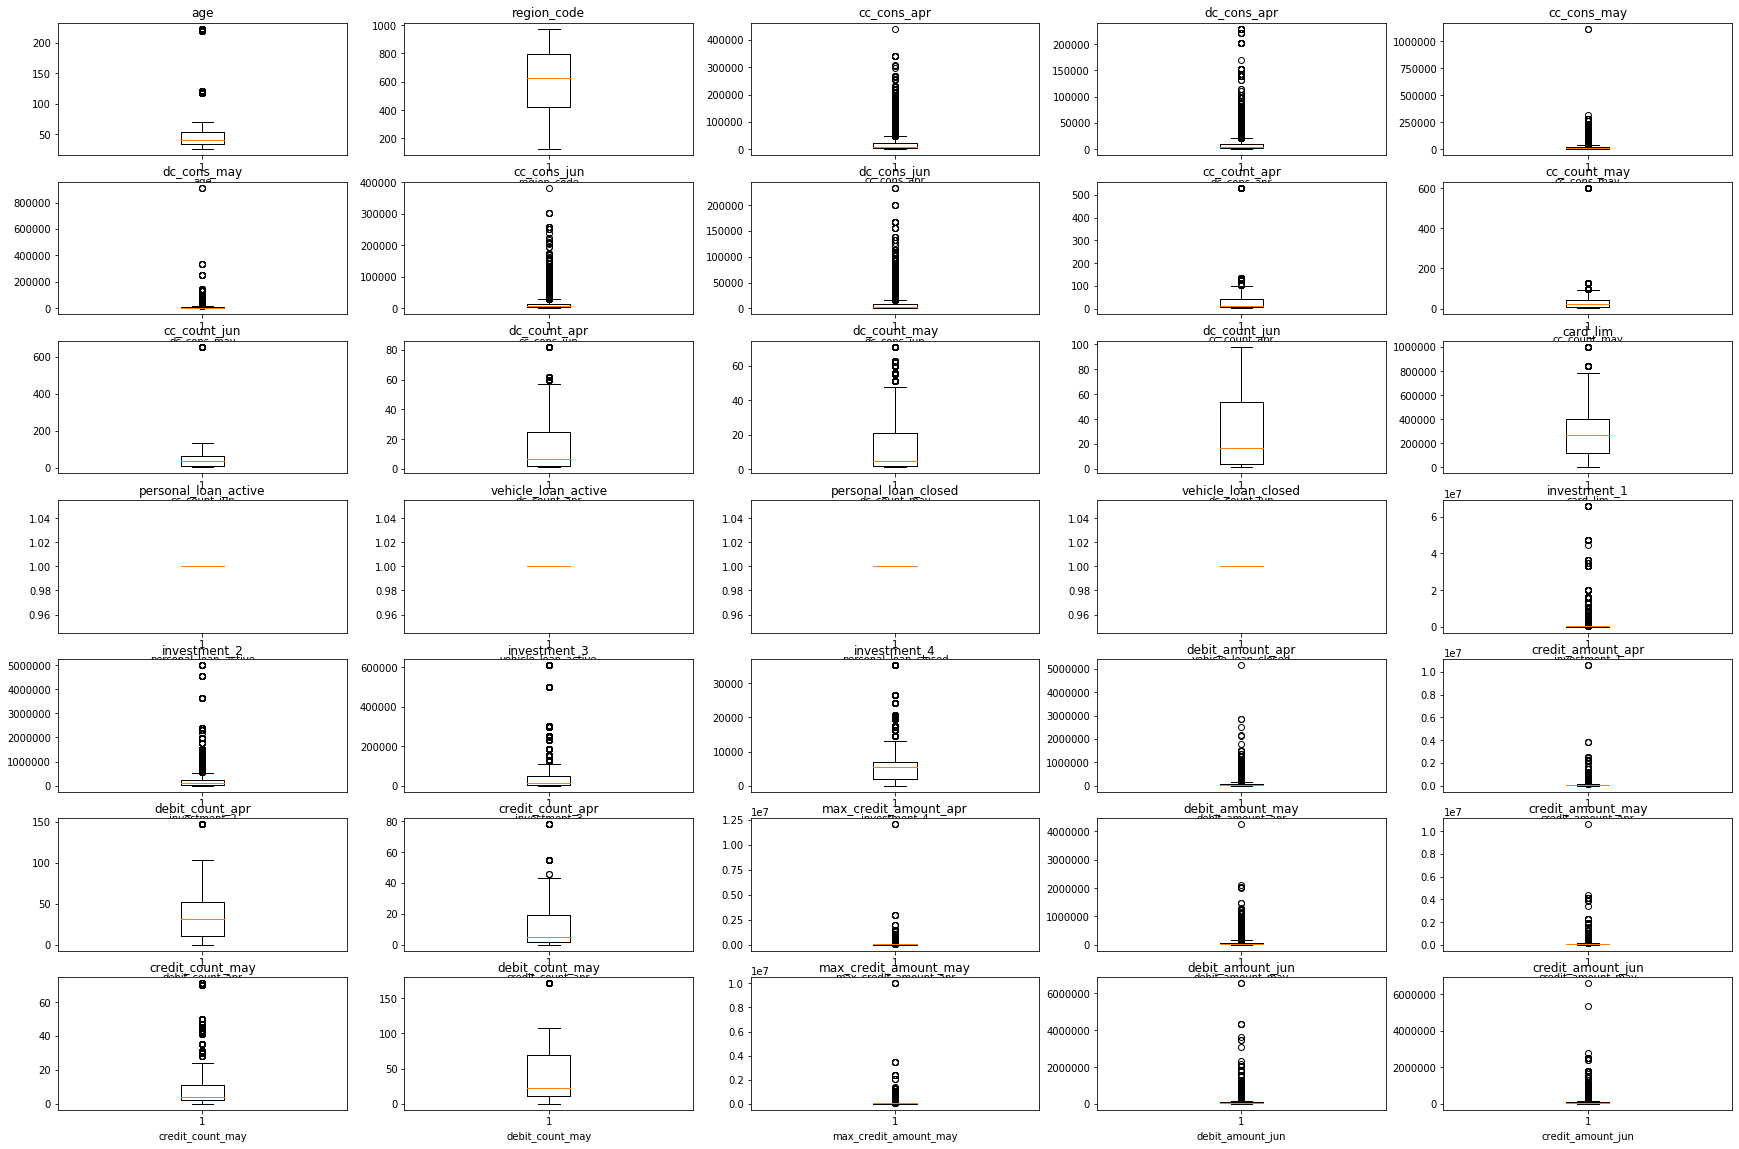

In [19]:
cols = num_data.columns

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
try:
    for i in range(0,7):
        for j in range(0,5):
            col = cols[i*5 + j]
            axes[i,j].set_title(col)
            axes[i,j].boxplot(num_data[col])
            #plt.figure(figsize=(20,20))
            axes[i,j].set_xlabel(col)
        
except IndexError:
    print('index 34 is out of bounds for axis 0 with size 34')

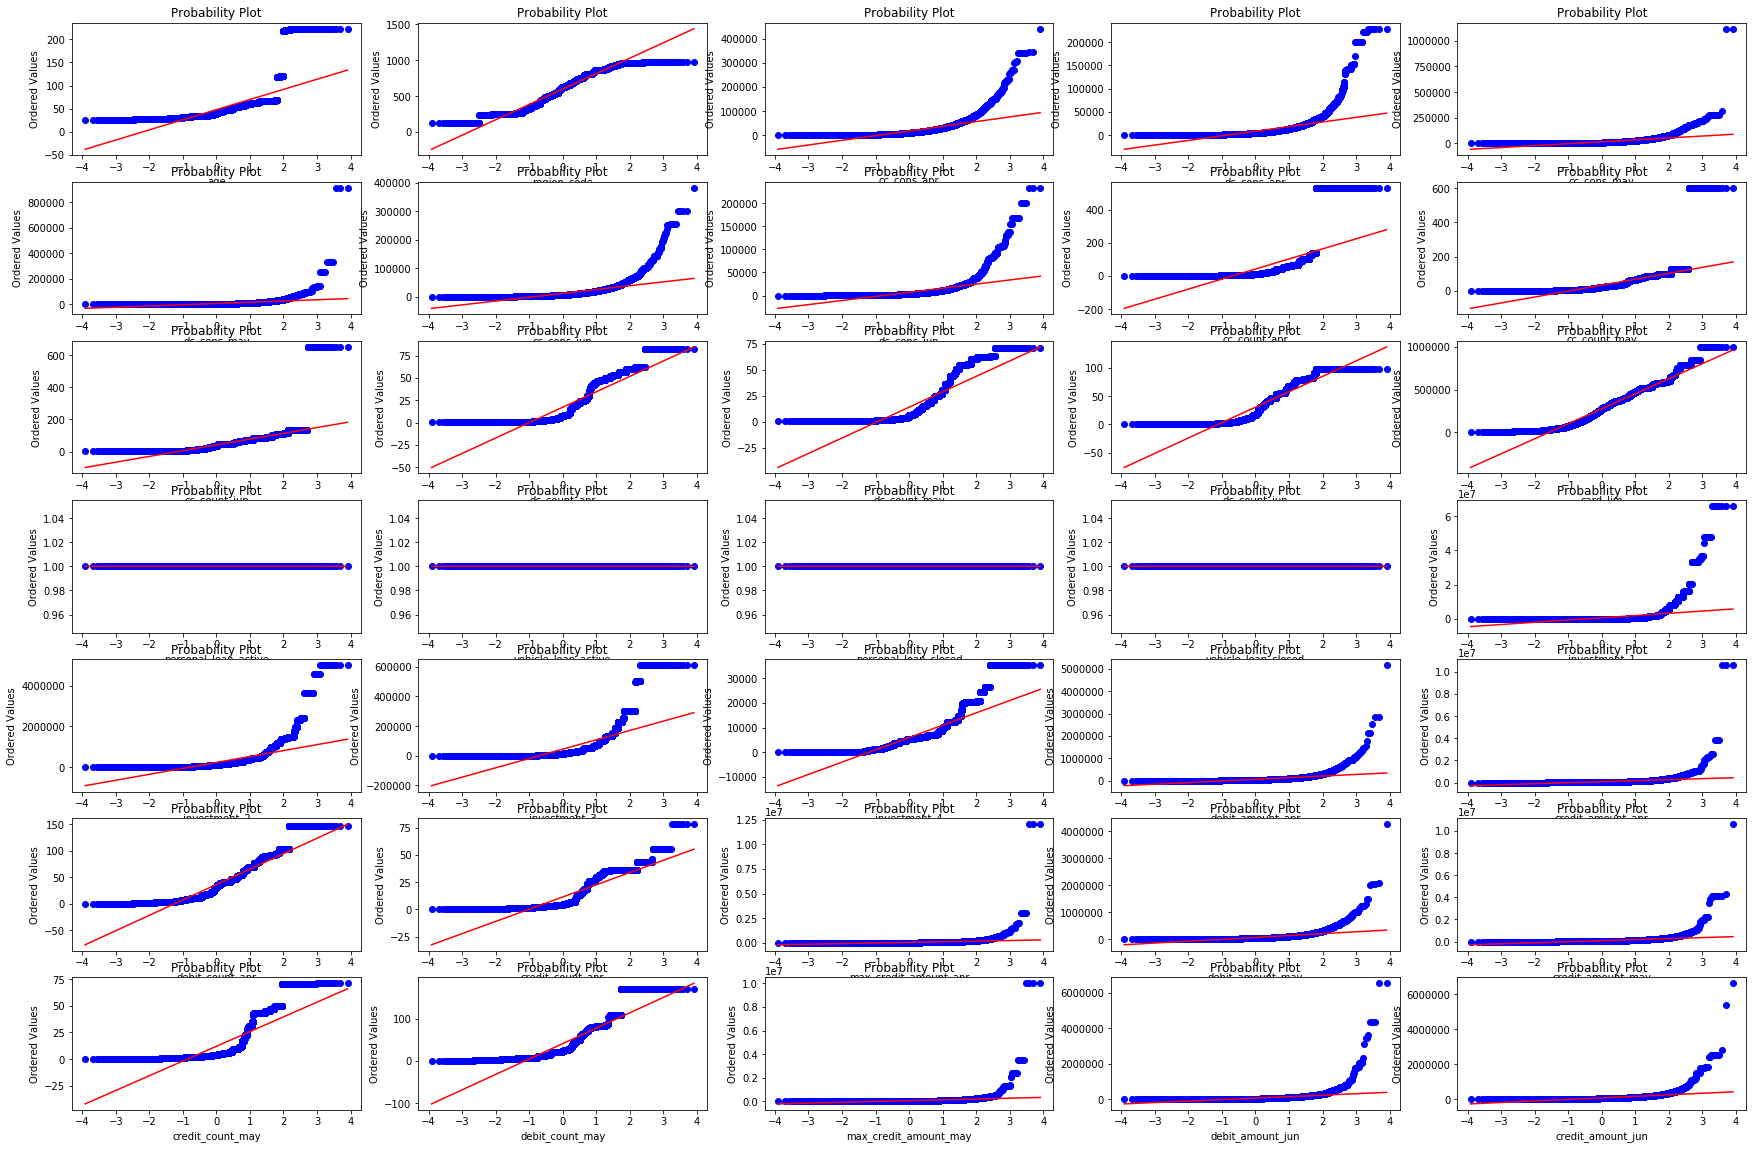

In [20]:
cols = num_data.columns

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
try:
    for i in range(0,7):
        for j in range(0,5):
            col = cols[i*5 + j]
            axes[i,j].set_title(col)
            stats.probplot(num_data[col], plot=axes[i,j])
            axes[i,j].set_xlabel(col)
        
except IndexError:
    print('index 34 is out of bounds for axis 0 with size 34')

# Bivarient:-
Target ='CC_cons'

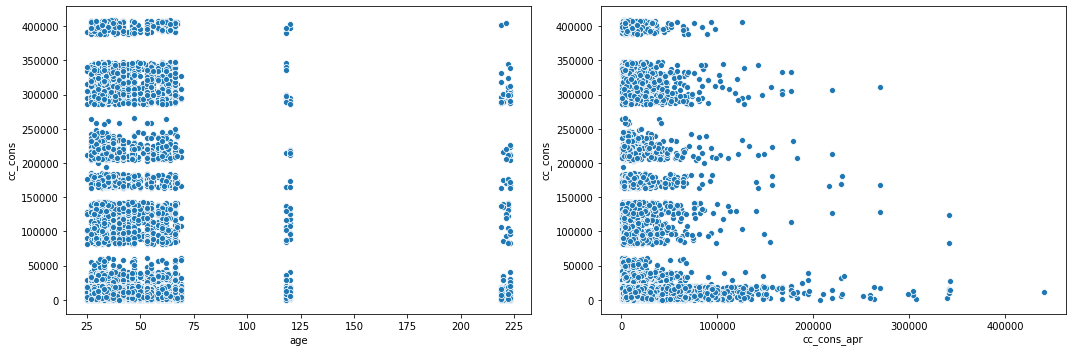

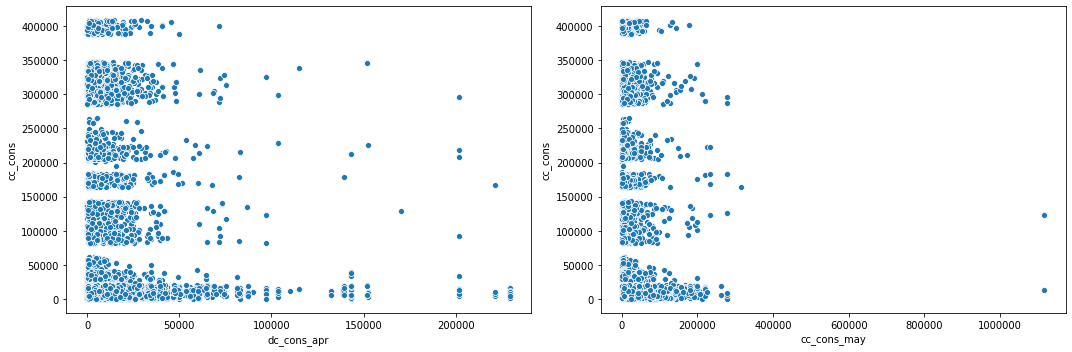

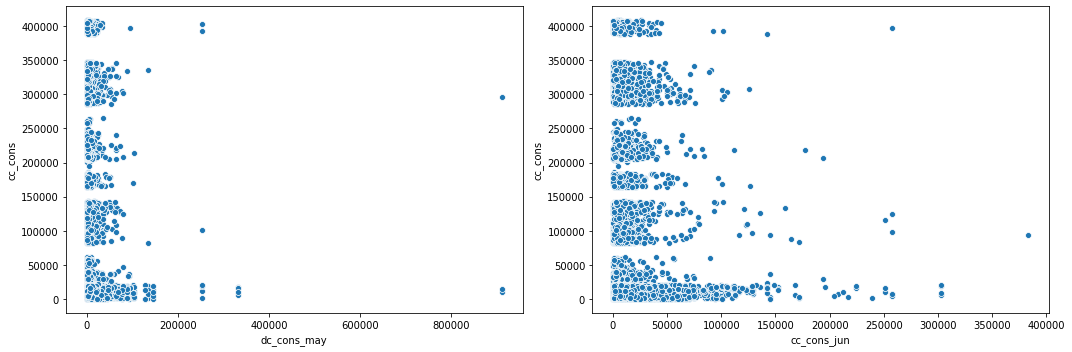

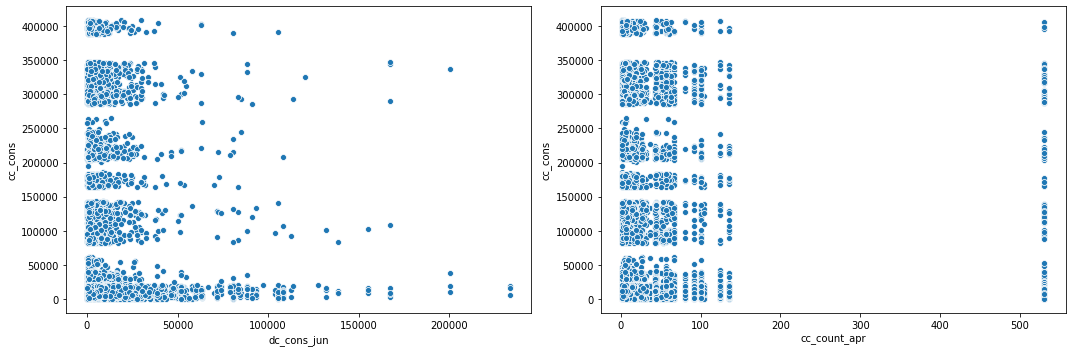

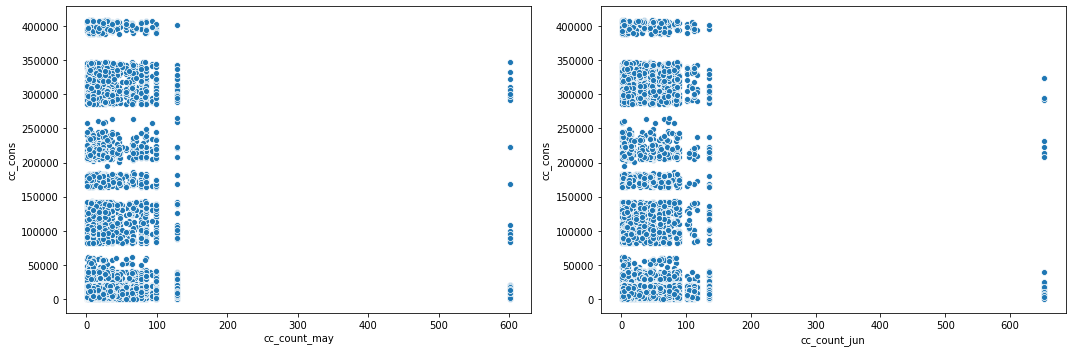

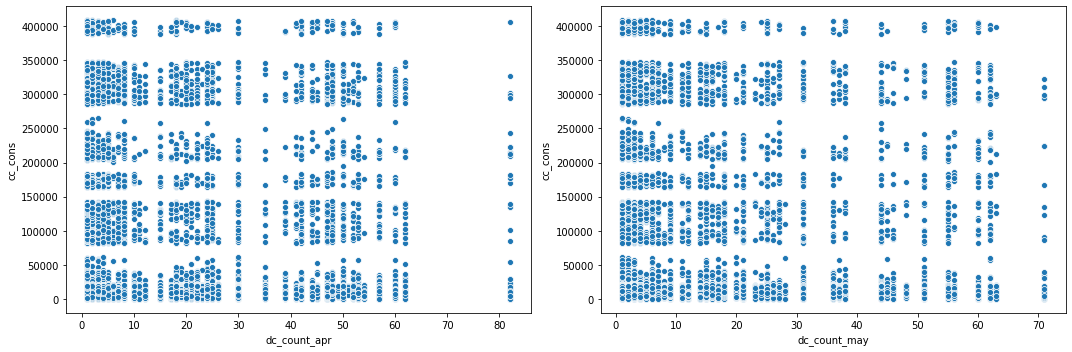

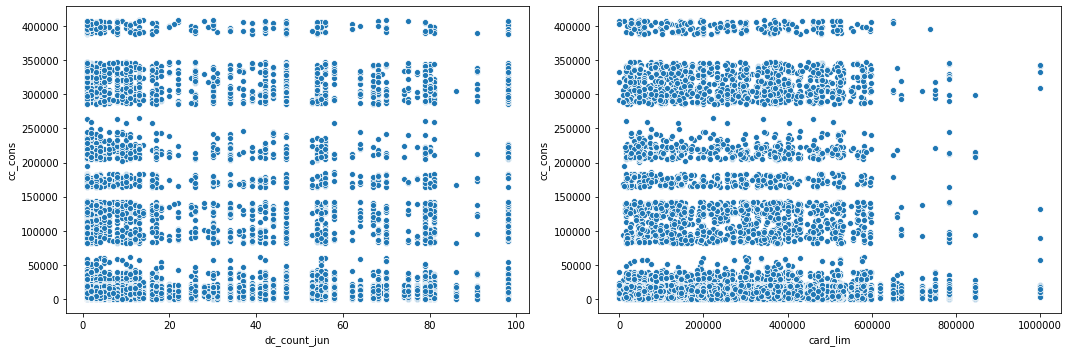

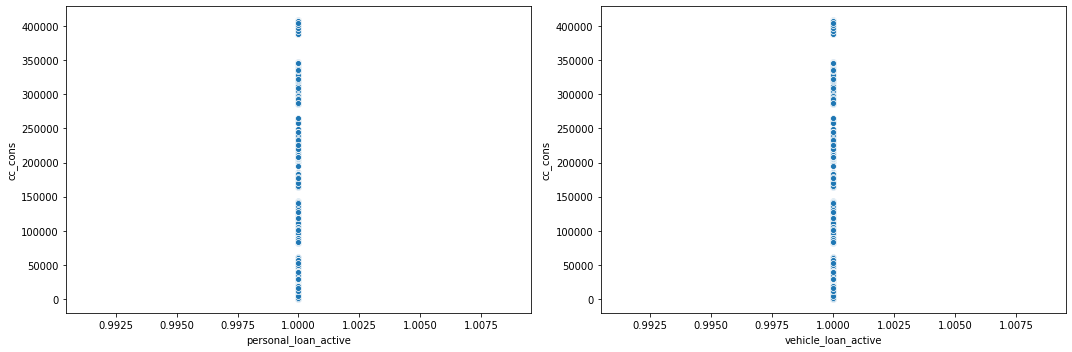

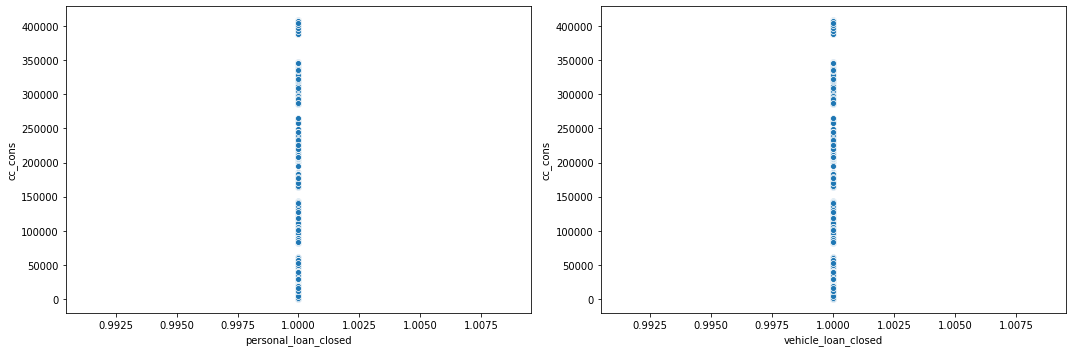

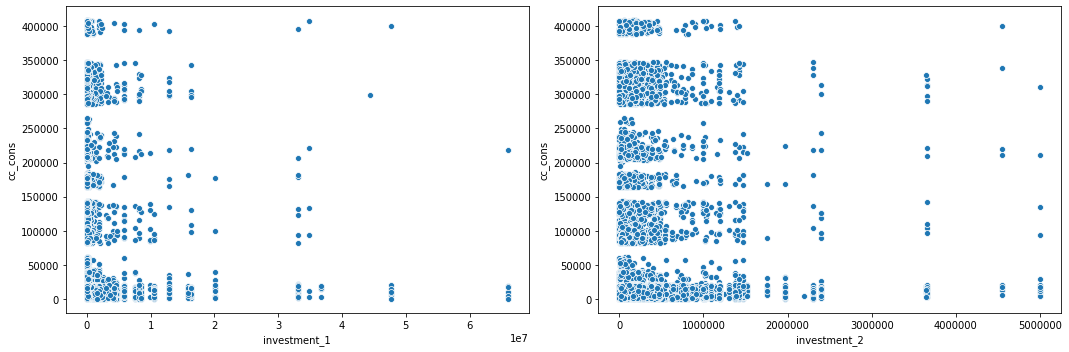

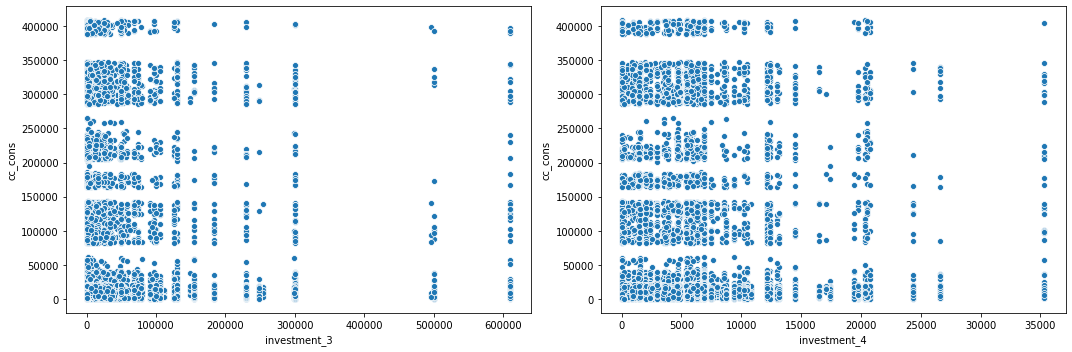

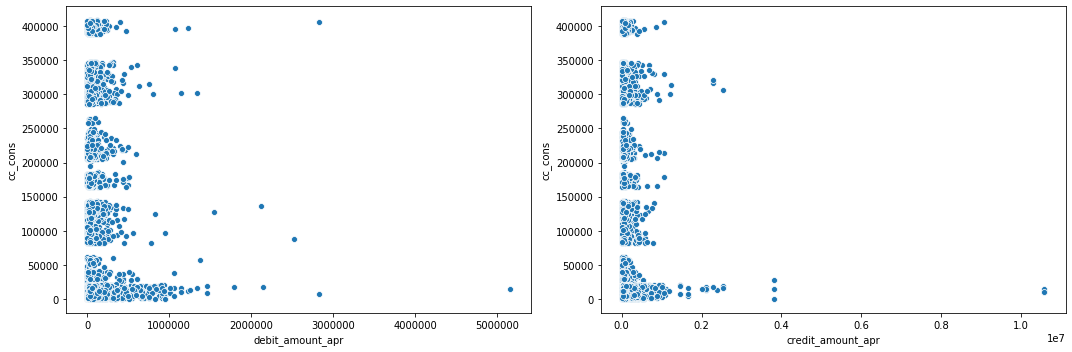

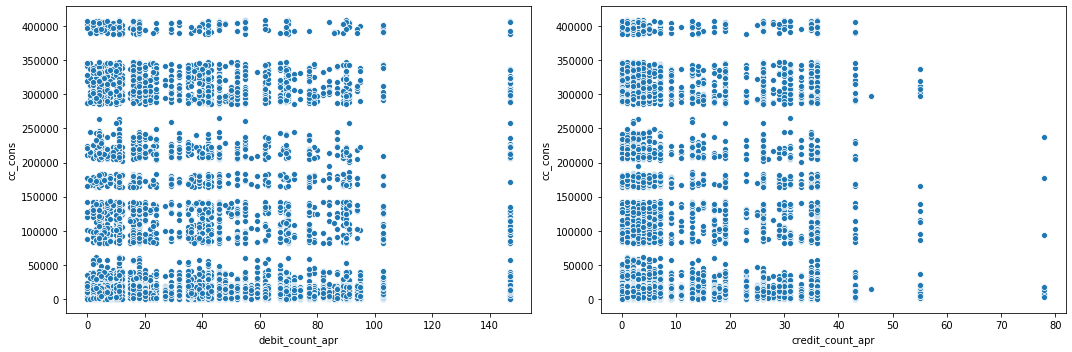

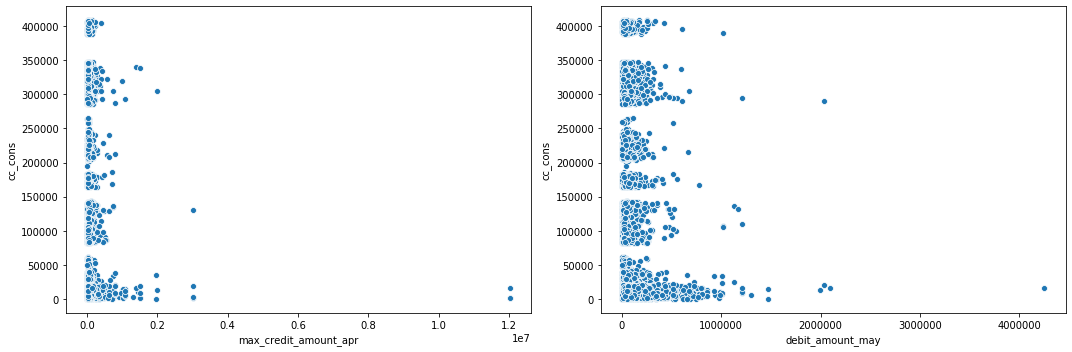

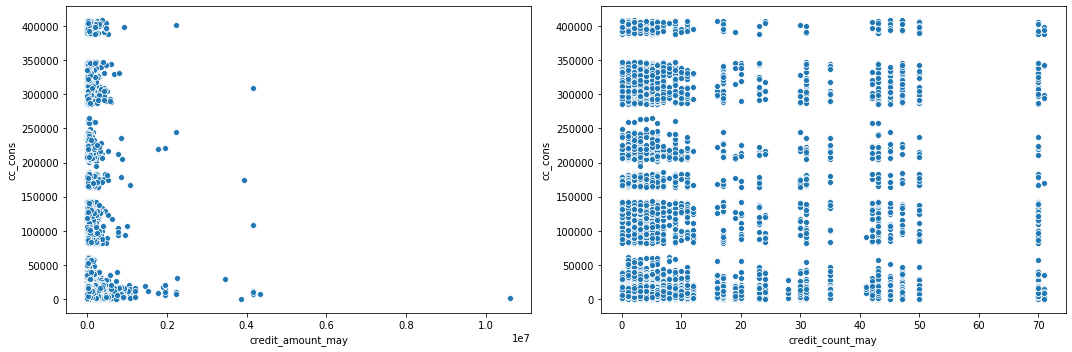

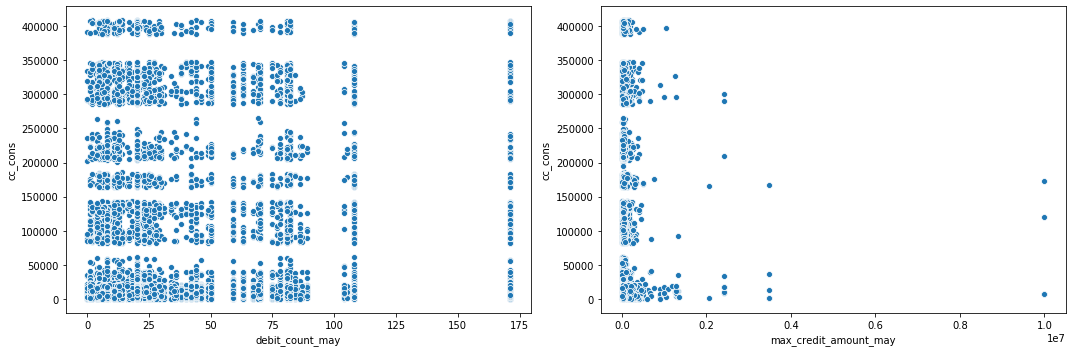

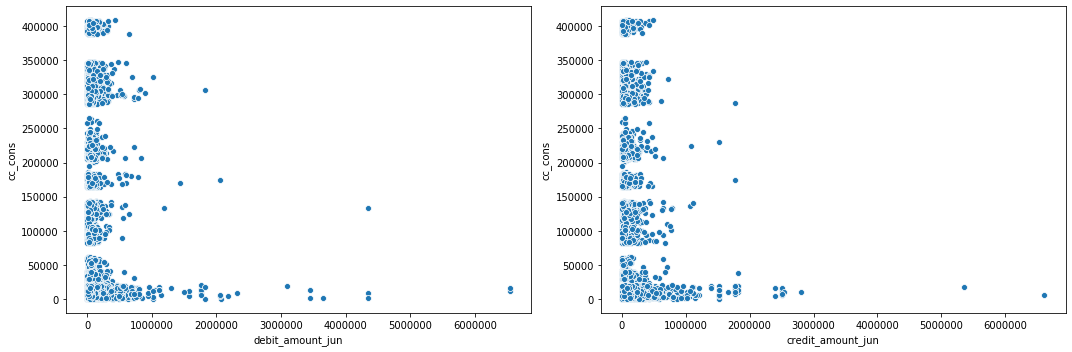

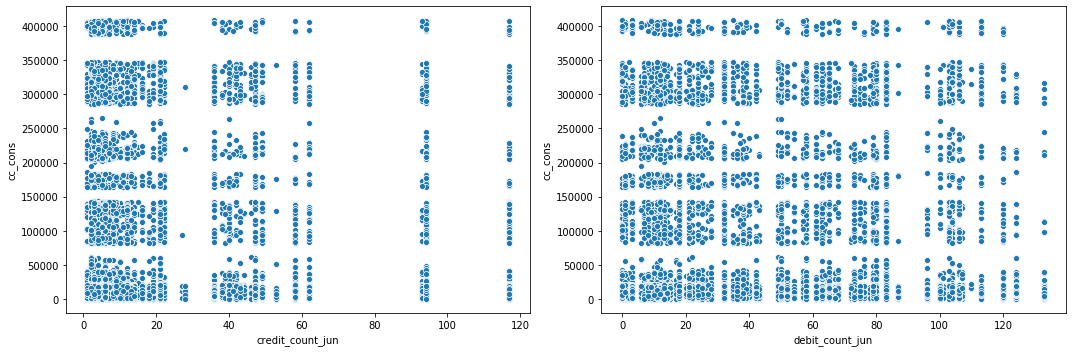

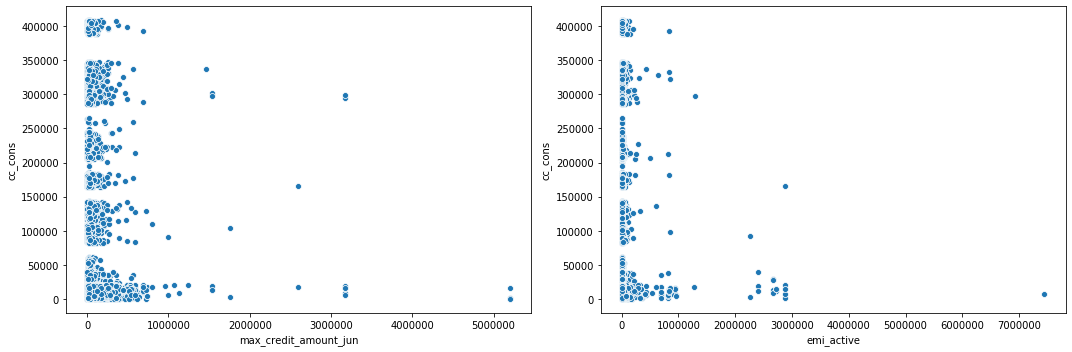

In [21]:
def bivariate_analysis_numerical(dataframe,target):
    numerical_columns = dataframe.select_dtypes(include=np.number).columns
    for i in range(0,len(numerical_columns),2):
        if len(numerical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.scatterplot(x=numerical_columns[i],y=target,data=dataframe)
            plt.subplot(122)            
            sns.scatterplot(numerical_columns[i+1],y=target,data=dataframe)
            plt.tight_layout()
            plt.show()


bivariate_analysis_numerical(data_train,data_train['cc_cons'])

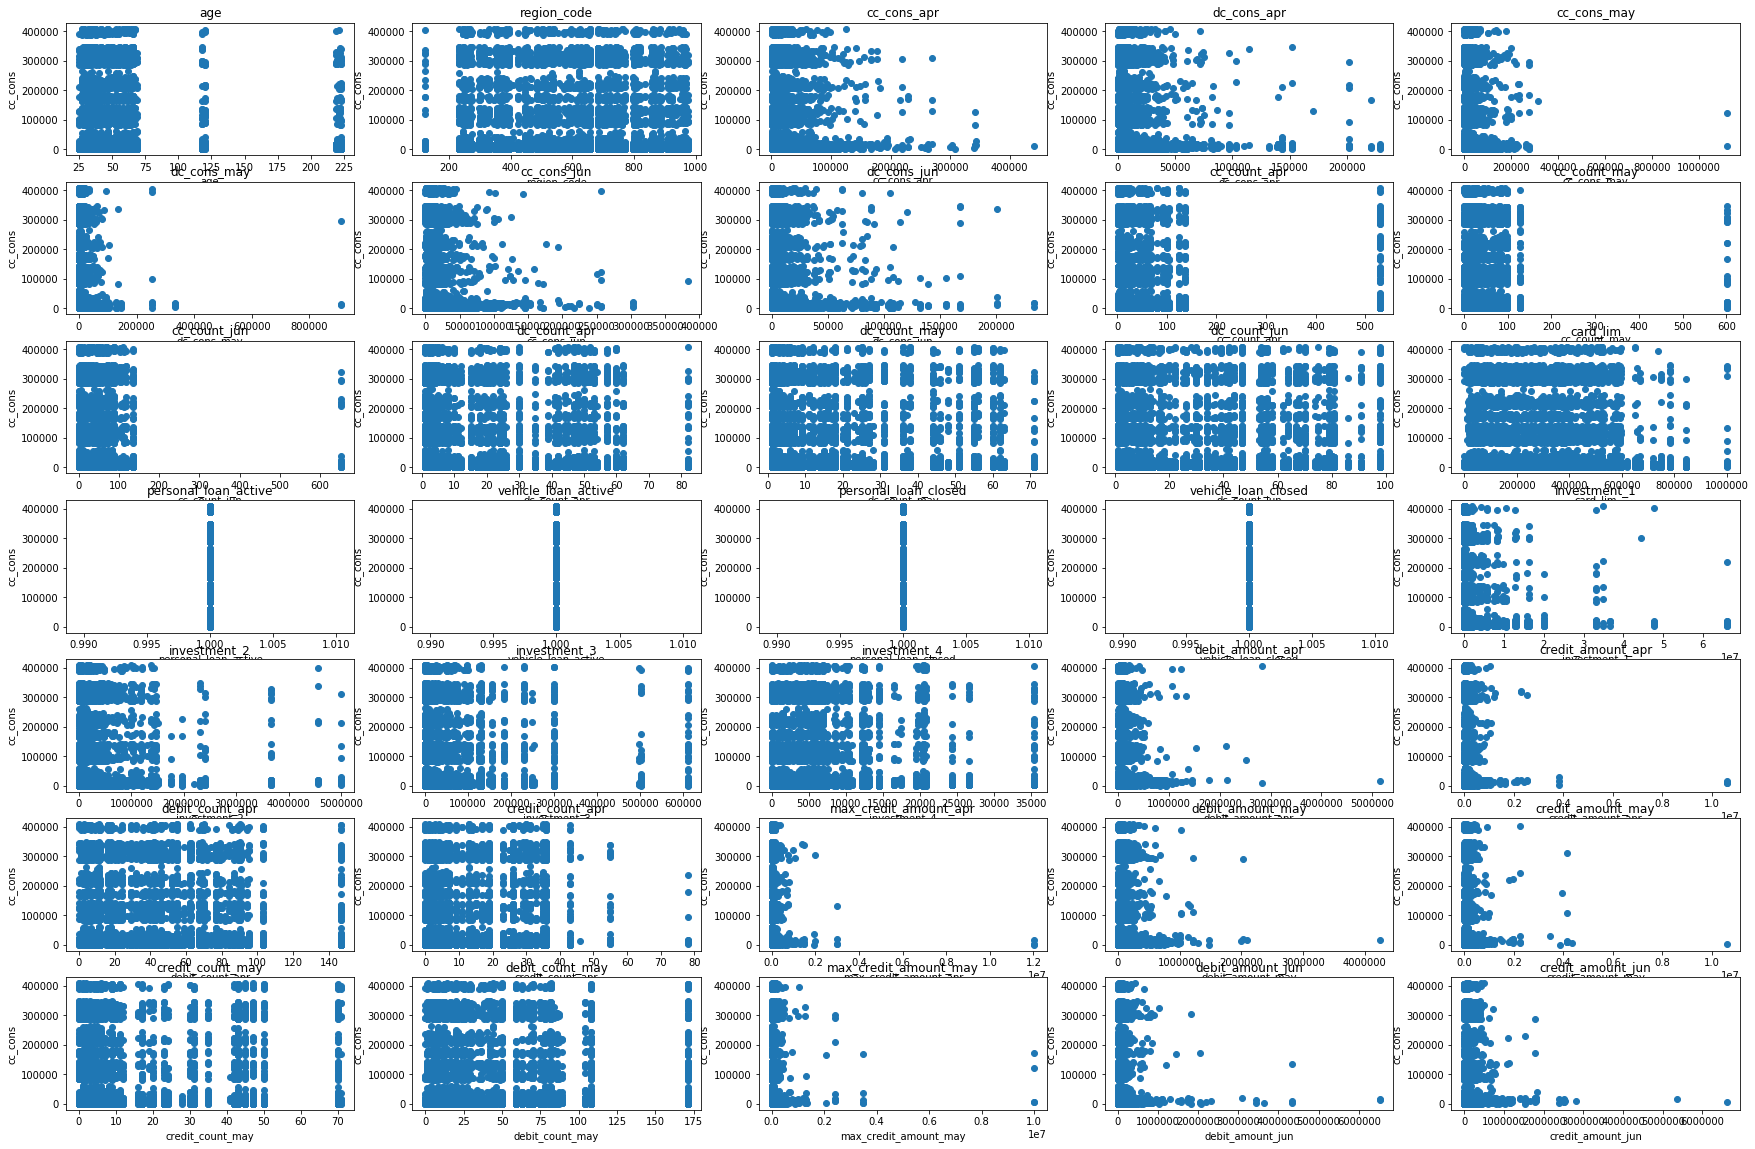

In [22]:
cols = num_data.columns

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
try:
    for i in range(0,7):
        for j in range(0,5):
            col = cols[i*5 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(num_data[col],data_train['cc_cons'])
            axes[i,j].set_xlabel(col)
            axes[i,j].set_ylabel('cc_cons')
        
except IndexError:
    print('index 34 is out of bounds for axis 0 with size 34')

In [23]:
cat_data.head()

account_type gender loan_enq
ID                                
12554      current      M        Y
17645      current      M        Y
7604       current      M        Y
1590       current      F        Y
16556      current      M        Y

# Treating the outliers 

In [24]:
num_data=num_data.drop('cc_cons',axis=1)

In [25]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return dataframe    

num_data=treat_outliers(num_data)

In [26]:
detect_outliers(num_data)

Feature Number of Outliers
0                     age                  0
1             region_code                  0
2             cc_cons_apr                  0
3             dc_cons_apr                  0
4             cc_cons_may                  0
5             dc_cons_may                  0
6             cc_cons_jun                  0
7             dc_cons_jun                  0
8            cc_count_apr                  0
9            cc_count_may                  0
10           cc_count_jun                  0
11           dc_count_apr                  0
12           dc_count_may                  0
13           dc_count_jun                  0
14               card_lim                  0
15   personal_loan_active                  0
16    vehicle_loan_active                  0
17   personal_loan_closed                  0
18    vehicle_loan_closed                  0
19           investment_1               2123
20           investment_2                  0
21           investment_3               1554
22           investment_4                  0
23       debit_amount_apr                  0
24      credit_amount_apr                  0
25        debit_count_apr                  0
26       credit_count_apr                  0
27  max_credit_amount_apr                  0
28       debit_amount_may                  0
29      credit_amount_may                  0
30       credit_count_may               2655
31        debit_count_may                  0
32  max_credit_amount_may                  0
33       debit_amount_jun                  0
34      credit_amount_jun                  0
35       credit_count_jun               2217
36        debit_count_jun                  0
37  max_credit_amount_jun                  0
38             emi_active                  0

In [27]:
num_data['credit_count_may']=winsorize(num_data['credit_count_may'], limits=[0.06, 0.15],inclusive=(True, True))
detect_outliers(pd.DataFrame(num_data['credit_count_may']))

Feature Number of Outliers
0  credit_count_may               2655

In [28]:
Target treatment:

SyntaxError: invalid syntax (<ipython-input-28-b7e1d618c46f>, line 1)

In [29]:
data_train['cc_cons']= winsorize(data_train['cc_cons'], limits=[0.06, 0.21],inclusive=(True, True))
detect_outliers(pd.DataFrame(data_train['cc_cons']))


Feature Number of Outliers
0  cc_cons                  0

{'whiskers': [<matplotlib.lines.Line2D at 0x1b8a8b4ae80>,
 'caps': [<matplotlib.lines.Line2D at 0x1b8a8b4a588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b8a8b4a940>],
 'medians': [<matplotlib.lines.Line2D at 0x1b8a84d36a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b8a8733e10>],
 'means': []}

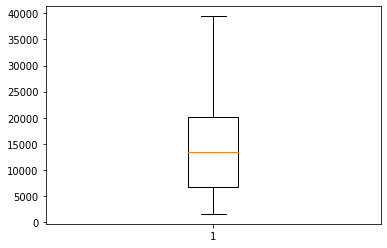

In [30]:
plt.boxplot(data_train['cc_cons'])

# Scaling the dependent_feature

In [31]:
def scaling(data):
    minmax=MinMaxScaler()
    minmax.fit(data)
    data_train_scale=pd.DataFrame(minmax.transform(data),columns=data.columns)
    data_train_scale=data_train_scale.set_index(data.index)
    return data_train_scale
data_scale=scaling(num_data)
data_scale.head()

age  region_code  cc_cons_apr  dc_cons_apr  cc_cons_may  \
ID                                                                    
12554  0.194444     0.723975     0.594975     0.000111     0.262221   
17645  0.194444     0.000000     0.445276     0.032671     0.556750   
7604   0.750000     0.872240     0.111669     0.130021     0.026136   
1590   0.027778     0.974763     0.735748     0.047623     0.328078   
16556  0.166667     0.872240     0.156003     0.361602     0.094195   

       dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  ...  \
ID                                                                        ...   
12554     1.000000     0.589779     0.713972      0.012658      0.296296  ...   
17645     0.000000     0.129109     0.032068      0.000000      0.061728  ...   
7604      0.224811     0.882214     0.308980      0.531646      0.370370  ...   
1590      0.557041     0.636692     0.857393      0.658228      0.000000  ...   
16556     0.097530     0.049141     0.416382      0.835443      0.555556  ...   

       credit_amount_may  credit_count_may  debit_count_may  \
ID                                                            
12554           1.000000          0.033333            0.450   
17645           0.391555          0.033333            0.925   
7604            0.390449          0.033333            0.975   
1590            0.342674          0.733333            0.425   
16556           0.145733          0.766667            0.575   

       max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
ID                                                                  
12554               0.195448          0.160520           0.056281   
17645               0.189099          0.245277           0.469946   
7604                0.052875          0.359437           0.463928   
1590                0.072024          0.440054           0.421058   
16556               0.202158          0.020189           0.495596   

       credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  
ID                                                                           
12554          0.000000         0.623762               0.498476    0.075188  
17645          0.339286         0.603960               0.217869    0.654691  
7604           0.089286         0.000000               0.256591    1.000000  
1590           0.339286         0.801980               0.419213    0.170516  
16556          0.107143         0.297030               0.307488    0.641291  

[5 rows x 39 columns]

In [32]:
merge_data=pd.concat([cat_data,data_scale,data_train['cc_cons']],axis=1)
merge_data.head()

account_type gender loan_enq       age  region_code  cc_cons_apr  \
ID                                                                       
12554      current      M        Y  0.194444     0.723975     0.594975   
17645      current      M        Y  0.194444     0.000000     0.445276   
7604       current      M        Y  0.750000     0.872240     0.111669   
1590       current      F        Y  0.027778     0.974763     0.735748   
16556      current      M        Y  0.166667     0.872240     0.156003   

       dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  ...  \
ID                                                         ...   
12554     0.000111     0.262221     1.000000     0.589779  ...   
17645     0.032671     0.556750     0.000000     0.129109  ...   
7604      0.130021     0.026136     0.224811     0.882214  ...   
1590      0.047623     0.328078     0.557041     0.636692  ...   
16556     0.361602     0.094195     0.097530     0.049141  ...   

       credit_count_may  debit_count_may  max_credit_amount_may  \
ID                                                                
12554          0.033333            0.450               0.195448   
17645          0.033333            0.925               0.189099   
7604           0.033333            0.975               0.052875   
1590           0.733333            0.425               0.072024   
16556          0.766667            0.575               0.202158   

       debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                                              
12554          0.160520           0.056281          0.000000         0.623762   
17645          0.245277           0.469946          0.339286         0.603960   
7604           0.359437           0.463928          0.089286         0.000000   
1590           0.440054           0.421058          0.339286         0.801980   
16556          0.020189           0.495596          0.107143         0.297030   

       max_credit_amount_jun  emi_active  cc_cons  
ID                                                 
12554               0.498476    0.075188  20014.0  
17645               0.217869    0.654691  10173.0  
7604                0.256591    1.000000  16095.0  
1590                0.419213    0.170516   7707.0  
16556               0.307488    0.641291  39456.0  

[5 rows x 43 columns]

# Skewness cheak

In [33]:
skew=merge_data.skew()
skew

age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              1.022063
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              1.088507
cc_count_apr             1.090164
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             1.155948
dc_count_jun             0.577510
card_lim                 0.069251
personal_loan_active     0.000000
vehicle_loan_active      0.000000
personal_loan_closed     0.000000
vehicle_loan_closed      0.000000
investment_1             1.758273
investment_2             0.903871
investment_3             1.403952
investment_4             0.511202
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         1.004090
max_credit_amount_apr    1.002865
debit_amount_may         0.926990
credit_amount_

In [34]:
for col in skew[skew>1].index:
    merge_data[col]=np.log1p(merge_data[col])

In [35]:
merge_data.skew()

age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              0.776853
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              0.839524
cc_count_apr             0.904539
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             0.944399
dc_count_jun             0.577510
card_lim                 0.069251
personal_loan_active     0.000000
vehicle_loan_active      0.000000
personal_loan_closed     0.000000
vehicle_loan_closed      0.000000
investment_1             1.574809
investment_2             0.903871
investment_3             1.164846
investment_4             0.511202
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         0.856307
max_credit_amount_apr    0.723361
debit_amount_may         0.926990
credit_amount_

# Encoding the cat Feature:

In [36]:
for col in merge_data.select_dtypes(include='object').columns:
    merge_data[col]=pd.get_dummies(merge_data[col])

In [37]:
merge_data.head()

account_type  gender  loan_enq       age  region_code  cc_cons_apr  \
ID                                                                          
12554             1       0         1  0.194444     0.723975     0.594975   
17645             1       0         1  0.194444     0.000000     0.445276   
7604              1       0         1  0.750000     0.872240     0.111669   
1590              1       1         1  0.027778     0.974763     0.735748   
16556             1       0         1  0.166667     0.872240     0.156003   

       dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  ...  \
ID                                                         ...   
12554     0.000111     0.262221     1.000000     0.589779  ...   
17645     0.032149     0.556750     0.000000     0.129109  ...   
7604      0.122236     0.026136     0.224811     0.882214  ...   
1590      0.046523     0.328078     0.557041     0.636692  ...   
16556     0.308662     0.094195     0.097530     0.049141  ...   

       credit_count_may  debit_count_may  max_credit_amount_may  \
ID                                                                
12554          0.032790            0.450               0.195448   
17645          0.032790            0.925               0.189099   
7604           0.032790            0.975               0.052875   
1590           0.550046            0.425               0.072024   
16556          0.569095            0.575               0.202158   

       debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                                              
12554          0.160520           0.056281          0.000000         0.623762   
17645          0.245277           0.469946          0.292136         0.603960   
7604           0.359437           0.463928          0.085522         0.000000   
1590           0.440054           0.421058          0.292136         0.801980   
16556          0.020189           0.495596          0.101783         0.297030   

       max_credit_amount_jun  emi_active  cc_cons  
ID                                                 
12554               0.498476    0.072495  20014.0  
17645               0.217869    0.503614  10173.0  
7604                0.256591    0.693147  16095.0  
1590                0.419213    0.157444   7707.0  
16556               0.307488    0.495483  39456.0  

[5 rows x 43 columns]

# Feature engineering

corelation between dependent and independent

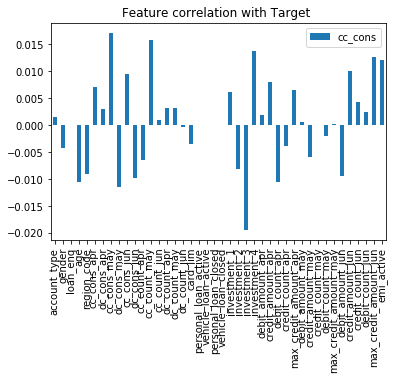

<Figure size 2160x1440 with 0 Axes>

In [38]:
corr=pd.DataFrame(merge_data.corr()['cc_cons'].drop('cc_cons'))
corr.plot(kind='bar')
plt.title('Feature correlation with Target ')
plt.figure(figsize=(30,20))
plt.show()

In [40]:
df=merge_data.copy()

In [41]:
merge_data.describe().T

count          mean           std     min  \
account_type           15000.0      0.848467      0.358580     0.0   
gender                 15000.0      0.137000      0.343859     0.0   
loan_enq               15000.0      1.000000      0.000000     1.0   
age                    15000.0      0.426200      0.341443     0.0   
region_code            15000.0      0.544722      0.331886     0.0   
cc_cons_apr            15000.0      0.336462      0.319272     0.0   
dc_cons_apr            15000.0      0.253089      0.223416     0.0   
cc_cons_may            15000.0      0.334196      0.323397     0.0   
dc_cons_may            15000.0      0.331265      0.318329     0.0   
cc_cons_jun            15000.0      0.336736      0.318845     0.0   
dc_cons_jun            15000.0      0.244836      0.222428     0.0   
cc_count_apr           15000.0      0.226724      0.231993     0.0   
cc_count_may           15000.0      0.342946      0.331776     0.0   
cc_count_jun           15000.0      0.428421      0.348549     0.0   
dc_count_apr           15000.0      0.316118      0.364194     0.0   
dc_count_may           15000.0      0.213585      0.235933     0.0   
dc_count_jun           15000.0      0.365124      0.354018     0.0   
card_lim               15000.0      0.490467      0.329750     0.0   
personal_loan_active   15000.0      0.000000      0.000000     0.0   
vehicle_loan_active    15000.0      0.000000      0.000000     0.0   
personal_loan_closed   15000.0      0.000000      0.000000     0.0   
vehicle_loan_closed    15000.0      0.000000      0.000000     0.0   
investment_1           15000.0      0.158589      0.223236     0.0   
investment_2           15000.0      0.346134      0.329966     0.0   
investment_3           15000.0      0.193583      0.225546     0.0   
investment_4           15000.0      0.424811      0.300748     0.0   
debit_amount_apr       15000.0      0.366554      0.305130     0.0   
credit_amount_apr      15000.0      0.367985      0.306241     0.0   
debit_count_apr        15000.0      0.399869      0.332238     0.0   
credit_count_apr       15000.0      0.243976      0.240036     0.0   
max_credit_amount_apr  15000.0      0.276581      0.209348     0.0   
debit_amount_may       15000.0      0.356097      0.311058     0.0   
credit_amount_may      15000.0      0.358823      0.312046     0.0   
credit_count_may       15000.0      0.213246      0.249252     0.0   
debit_count_may        15000.0      0.405101      0.370113     0.0   
max_credit_amount_may  15000.0      0.370830      0.304112     0.0   
debit_amount_jun       15000.0      0.369495      0.310123     0.0   
credit_amount_jun      15000.0      0.369621      0.305766     0.0   
credit_count_jun       15000.0      0.205587      0.234818     0.0   
debit_count_jun        15000.0      0.415583      0.332132     0.0   
max_credit_amount_jun  15000.0      0.382455      0.290273     0.0   
emi_active             15000.0      0.247405      0.222678     0.0   
cc_cons                15000.0  16958.289400  13110.062285  1549.0   

                               25%           50%           75%           max  
account_type              1.000000      1.000000      1.000000      1.000000  
gender                    0.000000      0.000000      0.000000      1.000000  
loan_enq                  1.000000      1.000000      1.000000      1.000000  
age                       0.138889      0.333333      0.694444      1.000000  
region_code               0.276025      0.589905      0.867508      1.000000  
cc_cons_apr               0.079778      0.227608      0.507239      1.000000  
dc_cons_apr               0.067343      0.182745      0.403015      0.693147  
cc_cons_may               0.073603      0.217039      0.507945      1.000000  
dc_cons_may               0.078669      0.217624      0.497927      1.000000  
cc_cons_jun               0.082849      0.222134      0.511780      1.000000  
dc_cons_jun               0.060811      0.173914      0.382554      0.69314

In [42]:
corr_matrix=merge_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print(to_drop)

# Dropping the high correlated features
print("Columns to be dropped: ")
merge_data.drop(to_drop,axis=1,inplace=True)

[]
Columns to be dropped: 


here no any dependent feature corelated more than 0.5 to each other,so no need to drop the dependent feature

In [43]:
q1 = merge_data['cc_cons'].quantile(0.25)
q3 = merge_data['cc_cons'].quantile(0.75)
iqr = q3-q1
iqr

13337.75

In [44]:
#merge_data=merge_data[~((merge_data['cc_cons'] < (q1 - 1.5 * iqr)) |(merge_data['cc_cons'] > (q3 + 1.5 * iqr)))]

In [45]:
merge_data.head()

account_type  gender  loan_enq       age  region_code  cc_cons_apr  \
ID                                                                          
12554             1       0         1  0.194444     0.723975     0.594975   
17645             1       0         1  0.194444     0.000000     0.445276   
7604              1       0         1  0.750000     0.872240     0.111669   
1590              1       1         1  0.027778     0.974763     0.735748   
16556             1       0         1  0.166667     0.872240     0.156003   

       dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  ...  \
ID                                                         ...   
12554     0.000111     0.262221     1.000000     0.589779  ...   
17645     0.032149     0.556750     0.000000     0.129109  ...   
7604      0.122236     0.026136     0.224811     0.882214  ...   
1590      0.046523     0.328078     0.557041     0.636692  ...   
16556     0.308662     0.094195     0.097530     0.049141  ...   

       credit_count_may  debit_count_may  max_credit_amount_may  \
ID                                                                
12554          0.032790            0.450               0.195448   
17645          0.032790            0.925               0.189099   
7604           0.032790            0.975               0.052875   
1590           0.550046            0.425               0.072024   
16556          0.569095            0.575               0.202158   

       debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                                              
12554          0.160520           0.056281          0.000000         0.623762   
17645          0.245277           0.469946          0.292136         0.603960   
7604           0.359437           0.463928          0.085522         0.000000   
1590           0.440054           0.421058          0.292136         0.801980   
16556          0.020189           0.495596          0.101783         0.297030   

       max_credit_amount_jun  emi_active  cc_cons  
ID                                                 
12554               0.498476    0.072495  20014.0  
17645               0.217869    0.503614  10173.0  
7604                0.256591    0.693147  16095.0  
1590                0.419213    0.157444   7707.0  
16556               0.307488    0.495483  39456.0  

[5 rows x 43 columns]

# Linear Model

In [46]:
y=merge_data['cc_cons']
X=merge_data.drop('cc_cons',axis=1)
merge_data.describe().T

count          mean           std     min  \
account_type           15000.0      0.848467      0.358580     0.0   
gender                 15000.0      0.137000      0.343859     0.0   
loan_enq               15000.0      1.000000      0.000000     1.0   
age                    15000.0      0.426200      0.341443     0.0   
region_code            15000.0      0.544722      0.331886     0.0   
cc_cons_apr            15000.0      0.336462      0.319272     0.0   
dc_cons_apr            15000.0      0.253089      0.223416     0.0   
cc_cons_may            15000.0      0.334196      0.323397     0.0   
dc_cons_may            15000.0      0.331265      0.318329     0.0   
cc_cons_jun            15000.0      0.336736      0.318845     0.0   
dc_cons_jun            15000.0      0.244836      0.222428     0.0   
cc_count_apr           15000.0      0.226724      0.231993     0.0   
cc_count_may           15000.0      0.342946      0.331776     0.0   
cc_count_jun           15000.0      0.428421      0.348549     0.0   
dc_count_apr           15000.0      0.316118      0.364194     0.0   
dc_count_may           15000.0      0.213585      0.235933     0.0   
dc_count_jun           15000.0      0.365124      0.354018     0.0   
card_lim               15000.0      0.490467      0.329750     0.0   
personal_loan_active   15000.0      0.000000      0.000000     0.0   
vehicle_loan_active    15000.0      0.000000      0.000000     0.0   
personal_loan_closed   15000.0      0.000000      0.000000     0.0   
vehicle_loan_closed    15000.0      0.000000      0.000000     0.0   
investment_1           15000.0      0.158589      0.223236     0.0   
investment_2           15000.0      0.346134      0.329966     0.0   
investment_3           15000.0      0.193583      0.225546     0.0   
investment_4           15000.0      0.424811      0.300748     0.0   
debit_amount_apr       15000.0      0.366554      0.305130     0.0   
credit_amount_apr      15000.0      0.367985      0.306241     0.0   
debit_count_apr        15000.0      0.399869      0.332238     0.0   
credit_count_apr       15000.0      0.243976      0.240036     0.0   
max_credit_amount_apr  15000.0      0.276581      0.209348     0.0   
debit_amount_may       15000.0      0.356097      0.311058     0.0   
credit_amount_may      15000.0      0.358823      0.312046     0.0   
credit_count_may       15000.0      0.213246      0.249252     0.0   
debit_count_may        15000.0      0.405101      0.370113     0.0   
max_credit_amount_may  15000.0      0.370830      0.304112     0.0   
debit_amount_jun       15000.0      0.369495      0.310123     0.0   
credit_amount_jun      15000.0      0.369621      0.305766     0.0   
credit_count_jun       15000.0      0.205587      0.234818     0.0   
debit_count_jun        15000.0      0.415583      0.332132     0.0   
max_credit_amount_jun  15000.0      0.382455      0.290273     0.0   
emi_active             15000.0      0.247405      0.222678     0.0   
cc_cons                15000.0  16958.289400  13110.062285  1549.0   

                               25%           50%           75%           max  
account_type              1.000000      1.000000      1.000000      1.000000  
gender                    0.000000      0.000000      0.000000      1.000000  
loan_enq                  1.000000      1.000000      1.000000      1.000000  
age                       0.138889      0.333333      0.694444      1.000000  
region_code               0.276025      0.589905      0.867508      1.000000  
cc_cons_apr               0.079778      0.227608      0.507239      1.000000  
dc_cons_apr               0.067343      0.182745      0.403015      0.693147  
cc_cons_may               0.073603      0.217039      0.507945      1.000000  
dc_cons_may               0.078669      0.217624      0.497927      1.000000  
cc_cons_jun               0.082849      0.222134      0.511780      1.000000  
dc_cons_jun               0.060811      0.173914      0.382554      0.69314

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,)

In [48]:
detect_outliers(pd.DataFrame(y_train))

Feature Number of Outliers
0  cc_cons                  0

In [49]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [50]:
def model(model,X_train,X_test,y_train,y_test):
    mod=model()
    mod.fit(X_train,y_train)
    y=mod.predict(X_test)
    msle=rmsle(y_test,y)
    mse=np.sqrt(mean_squared_error(y_test,y))
    r2=r2_score(y_test,y)
    score=mod.score(X_test,y_test)
    return (msle,mse,r2,score)

In [51]:
y_test.isna().sum()

0

In [52]:
model(LinearRegression,X_train,X_test,y_train,y_test)

(1.0069633137404943,
 13057.017694430328,
 -0.0017774392348526291,
 -0.0017774392348526291)

In [53]:
model(Lasso,X_train,X_test,y_train,y_test)

(1.0072135873175123,
 13056.460674879438,
 -0.0016919683057547985,
 -0.0016919683057547985)

In [54]:
model(Ridge,X_train,X_test,y_train,y_test)

(1.007228889879322,
 13057.005723737997,
 -0.00177560237374208,
 -0.00177560237374208)

# Polynomial model

In [55]:
poly_model = make_pipeline(PolynomialFeatures(2),LinearRegression())

In [56]:
poly_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [57]:
y_poly=poly_model.predict(X_test)

In [58]:
np.sqrt(mean_squared_log_error(y_test,y_poly))

1.0227950416371956

# DecisionTree Regressor

In [59]:
tree=DecisionTreeRegressor(random_state=42,max_depth=4)
tree.fit(X_train,y_train)
y_tree=tree.predict(X_test)
rmsle(y_test,y_tree)

1.00825295726479

# RandomForest Regressor

In [60]:
rfor=RandomForestRegressor(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)
rfor.fit(X_train,y_train)
y_rf=rfor.predict(X_test)
rmsle(y_test,y_rf)
#r2_score((np.exp(y_test)-1),(np.exp(y_rf)-1))


1.0072629544044536

In [61]:
rf=RandomForestRegressor()
parameter_grid = {"max_depth": [2,3, 5],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}
grid_search=GridSearchCV(estimator=rf,param_grid =parameter_grid)
grid_search.fit(X_train,y_train)
y_gs=grid_search.predict(X_test)
rmsle((np.exp(y_test)-1),(np.exp(y_gs)-1))

nan

In [62]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features=1, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Random Search

In [65]:

random_search=RandomizedSearchCV(estimator=rf,param_distributions =parameter_grid,n_iter=20,random_state=0)
random_search.fit(X_train,y_train)
y_rs=random_search.predict(X_test)
rmsle(y_test,y_rs)

1.006788952937432

# XGBRegressor

In [67]:

xgb_clf=XGBRFRegressor(base_estimator=tree, random_state=0)
xgb_clf.fit(X_train,y_train)
xg_y=xgb_clf.predict(X_test)
rmsle(y_test,xg_y)

[19:53:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1.0061800365443216

# GradientBoostingRegressor

In [65]:
gd=GradientBoostingRegressor(random_state=0)
gd.fit(X_train,y_train)
y_gd=gd.predict(X_test)
rmsle(y_test)-1),(np.exp(y_gd)-1))

0.7977524801974887